# Projet: Feature selection techniques for data mining 

#

![projet](https://miro.medium.com/v2/resize:fit:720/format:webp/1*CHnUGGi0rPzwyUlT0pphcw.png)

---

## Table des matières
- [Introduction](#introduction) 
- [FST](#fst)
- [Résultats](#resultats)
- [Annexe](#annexe)

---

## Démarche
 <p> La comparaison portera sur des techniques basées sur la théorie Roughset et sur une technique non Roughset </p>
 
---


# Introduction  
<a id='introduction'></a>

&nbsp;

<p>Le projet consiste à utiliser la sélection de variables afin de réduire la volumétrie des données traitées et ainsi comparer les performances des modèles de classification selon la technique de sélection employée.</p>


---

### Le dataset provient d'UCI machine learning : https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29

### Data pre-processing

* Librairies utilisées

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from itertools import chain, combinations

from frlearn.feature_preprocessors import FRFS
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

1. Exploration des données

In [2]:
#filename = 'breast-cancer-wisconsin.csv'  #lecture de csv
#df = pd.read_csv(filename)
#df.columns.tolist()

col = ['Sample code number',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=col)

In [3]:
# Afficher les premières lignes pour vérifier que les données ont été chargées correctement
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<a name="intro"></a>
Le jeu de données est breast-cancer-wisconsin original, il provient du prélèvement de fluide/échantillon mammaire par FNA (Fine Needle Aspiration). Il y a une échelle de 1 à 10 par les médecins, plus le nombre est élevé (en général) plus la caractéristique se place dans un caractère de tumeur maligne.

- **Sample code number** : sert à identifier de manière unique chaque échantillon de tissu prélevé
  - Aucune signification médicale
- **Clump Thickness** : mesure l'épaisseur des cellules , si elles sont en monocouches ou multicouche
  - Entier compris entre 1 et 10, où 1 représente une épaisseur très fine et 10 représente une épaisseur très épaisse.
  - Plus l'épaisseur est importante plus il y a de chance que ce soit des cellules malignes.
- **Uniformity of Cell Size** : mesure la cohérence de la taille des cellules dans un échantillon 
  - Entier compris entre 1 et 10, 1 représente une taille très cohérente des cellules et 10 représente une taille très peu égale des cellules
  - Plus la taille des cellules est uniforme, moins il y a de chance que ce soit un cancer.
- **Uniformity of Cell Shape** : mesure la régularité de la forme des cellules dans un échantillon de tissu
  - Entier compris entre 1 et 10, où 1 représente une grande régularité des cellules et 10 représente une forme   non régulière des cellules
  - Plus la forme des cellules est semblable, moins il y a de chance que ce soit un cancer.
- **Marginal Adhesion** : mesure la qualité de la liaison des cellules entre elles.
  - Entier compris entre 1 et 10, où 1 représente une liaison très faible des cellules et 10 représente une liaison très forte des cellules
  - La perte d'adhérence des cellules est un signe de malignité.
- **Single Epithelial Cell Size** : mesure la taille des cellules épithéliales dans un échantillon
  - Entier compris entre 1 et 10, où 1 représente une taille très petite des cellules épithéliales et 10 représente une taille très importante des cellules épithiales
  - Plus la taille des cellules épithéliales est grande, plus il y a de chance que ce soit une cellule maligne.
- **Bare Nuclei** : mesure le nombre de noyaux nus, qui ne sont pas entourés de cytoplasme 
  - Entier compris entre 1 et 10, où 1 représente un très faible nombre de noyaux nus et 10 représente un très grand nombre de noyaux nus
  - Un grand nombre de noyaux nus se trouve dans les échantillon bénins.
- **Bland Chromatin** : mesure la "texture" uniforme du noyau , vue dans l'échantillon
  - Entier compris entre 1 et 10, où 1 représente une texture très homogène du chromatine et 10 représente une qualité très hétérogène du chromatine
  - Plus la chromatine est hétérogène plus il y a de chance que ce soit une cellule maligne.
- **Normal Nucleoli** : mesure des noyaux qui ne sont pas entourés de cytoplasme
  - Entier compris entre 1 et 10, où 1 représente un noyau très normal et 10 représente un noyau très anormal
  - Plus le noyau est anormal plus il y a de chance que ce soit une cellule maligne.
- **Mitoses** : mesure le nombre de mitoses (division cellulaire) dans les cellules d'un échantillon de tissu
  - Entier compris entre 1 et 10, où 1 représente un très faible nombre de mitoses et 10 représente un très grand nombre de mitoses
  - Plus le nombre de mitoses est élevé, plus il y a de chance de malignité.
- **Class** : (2 pour bénin, 4 pour malin)
  - Cette variable indique si l'échantillon est soit bénin ou soit malin. 
    2 signifie que les cellules sont bénignes et 4 signifie qu'elles sont malignes.
    -> je changerai cet encodage pour 0 benign, 1 malignant

In [4]:
#Compter les valeurs manquantes
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
# Afficher les informations sur les données (nombre de lignes, nombre de colonnes, noms des colonnes, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


> * Le jeu de données est composé de 699 instances et 10 attributs discrets et d'un de type catégorique
> * L'affichage précedemment des premières lignes du dataset montre que toutes les valeurs sont censées être discrètes, or "Bare Nuclei" est affiché de type catégorique

> ➡️ On cherche alors les valeurs qui ne sont pas entières dans cette colonne

In [6]:
#rechercher les valeurs qui ne sont pas des entiers
non_integer_values = []
for value in df['Bare Nuclei']:
    try:
        int(value)
    except ValueError:
        non_integer_values.append(value)
        
print(non_integer_values)
print('Valeurs manquantes: ',len(non_integer_values))

['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']
Valeurs manquantes:  16


 > On observe que des valeurs '?' indiquent des valeurs manquantes dans cette colonne "Bare Nuclei"

In [7]:
# remplacer les valeurs "?" par NaN
df.replace("?", np.nan, inplace=True)

> On remplace les valeurs '?' par des valeurs NaN afin de les comptabiliser pour le calcul des valeurs manquantes

In [8]:
#Compter les valeurs manquantes
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [9]:
# Afficher les statistiques générales sur les données (moyenne, écart-type, etc.)
df2 = df.drop('Sample code number', axis=1)
df2.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


> On supprime le sample code number car c'est un identifiant unique pour chaque instance, on a pas besoin de celui-ci pour la classification

Critères importants pour l'évaluation d'un cancer du sein "https://www.e-cancer.fr/Patients-et-proches/Les-cancers/Cancer-du-sein/Les-grades-du-cancer" :
*  Clump Thickness: La moyenne est de 4,42 avec une déviation standard de 2,82, et une plage allant de 1 à 10. Ce paramètre peut être utilisé pour déterminer si les cellules sont mono-couches ou multi-couches, avec des cellules bénignes tendant à être groupées en mono-couches et des cellules cancéreuses souvent regroupées en multi-couches.

 * Uniformity of Cell Size: La moyenne est de 3,13 avec une déviation standard de 3,05, et une plage allant de 1 à 10. Ce paramètre peut être utilisé pour évaluer la cohérence de la taille des cellules dans l'échantillon. Les cellules cancéreuses ont tendance à varier en taille.
 
 * Uniformity of Cell Shape: La moyenne est de 3,21 avec une déviation standard de 2,97, et une plage allant de 1 à 10. Ce paramètre peut être utilisé pour estimer l'égalité des formes cellulaires et identifier les variations marginales, car les cellules cancéreuses ont tendance à varier en forme.

* Mitoses: La moyenne est de 1,59 avec une déviation standard de 1,72, et une plage allant de 1 à 10. Il s'agit d'une estimation du nombre de mitoses qui ont eu lieu. Plus la valeur est grande, plus il y a de chances de malignité.

>Toutes les mesures semblent avoir une répartition à droite de la distribution sur l'axe des x (la majorité des valeurs se situent au-dessus de la médiane de 50%).
 

### On trace pour en être convaincu, les graphes de la distribution de chaque attribut

''

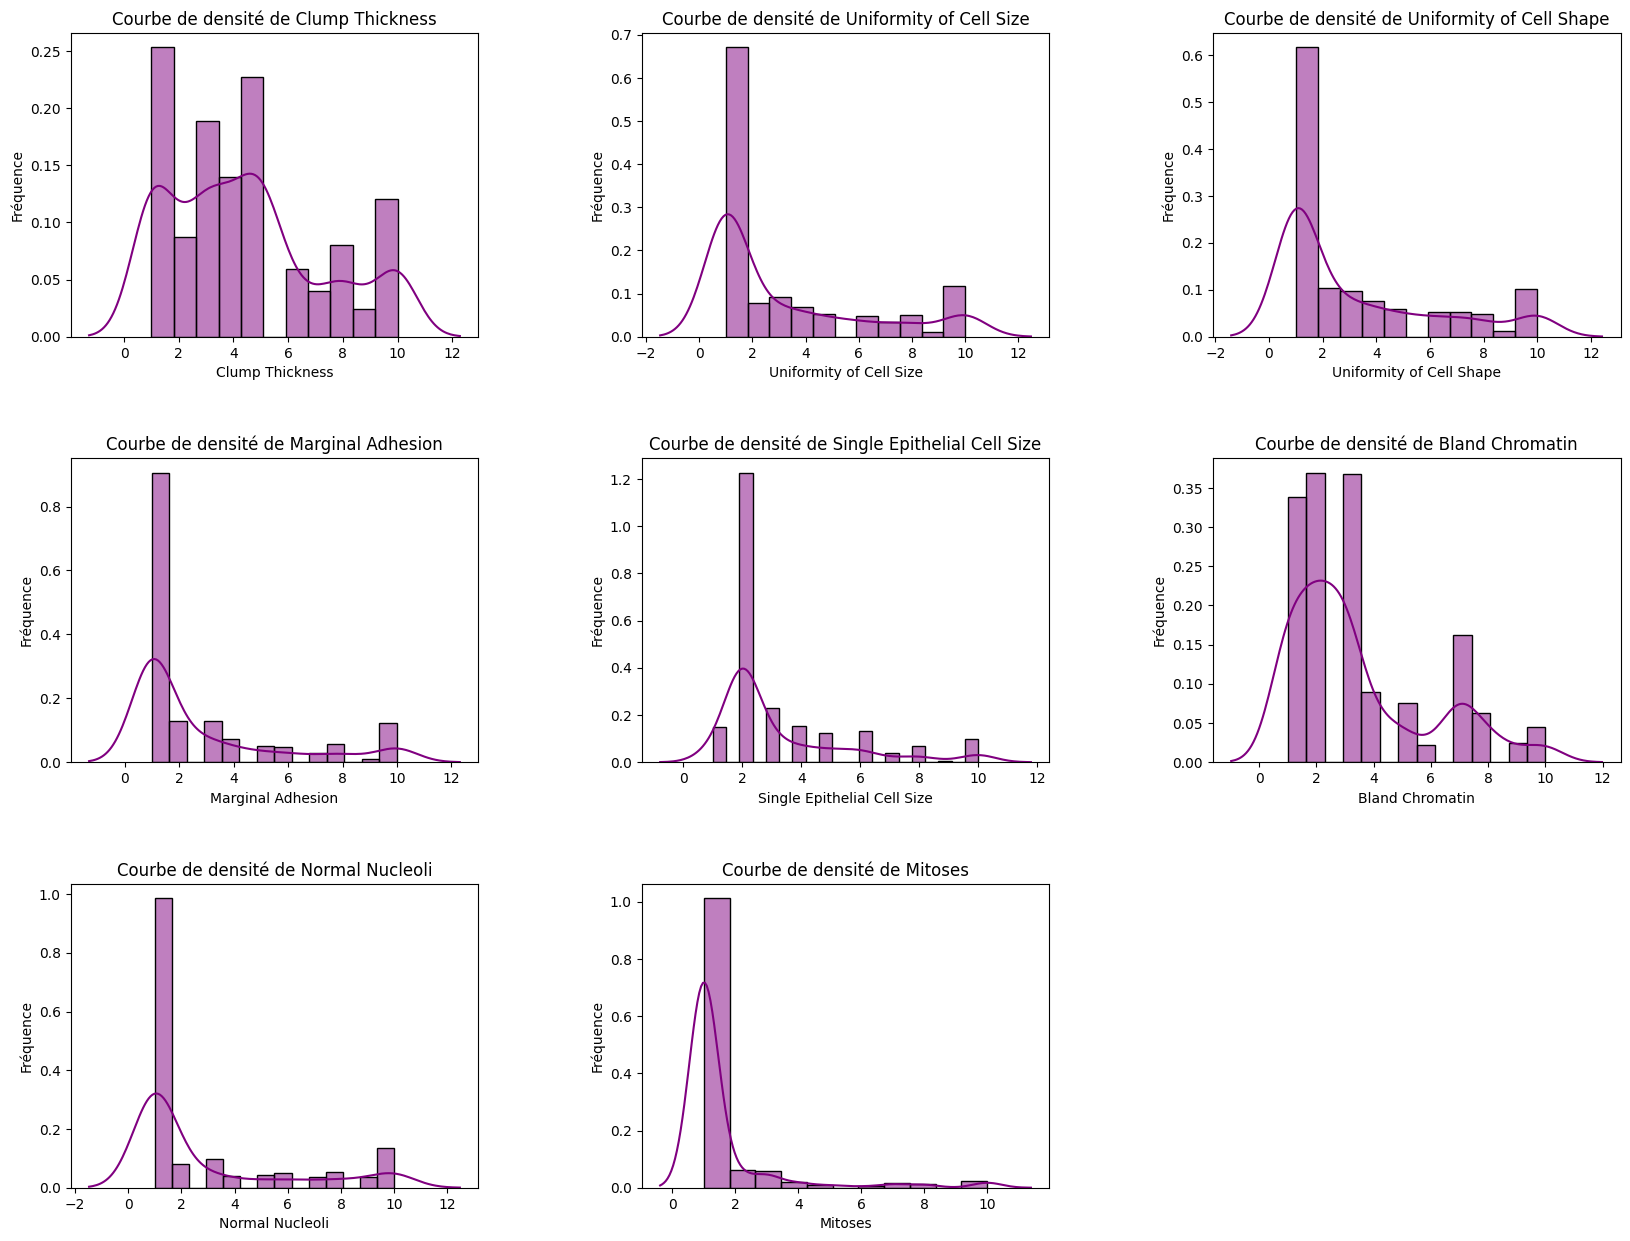

In [10]:
# Utiliser seaborn pour créer des graphiques à barres pour voir les fréquences de chaque classe pour chaque variable
plt.figure(figsize=(20,15))

columns = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion",
          "Single Epithelial Cell Size", "Bland Chromatin", "Normal Nucleoli", "Mitoses"] #On ne trace pas Bare Nuclei car il y a encore des valeurs manquantes

for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col],kde=True, stat="density", kde_kws=dict(cut=3),color='purple')
    plt.title(f'Courbe de densité de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
''

> Avec ces courbes , on confirme bien notre intuition, la tendance générale est à une distribution à queue plus longue sur la droite

''

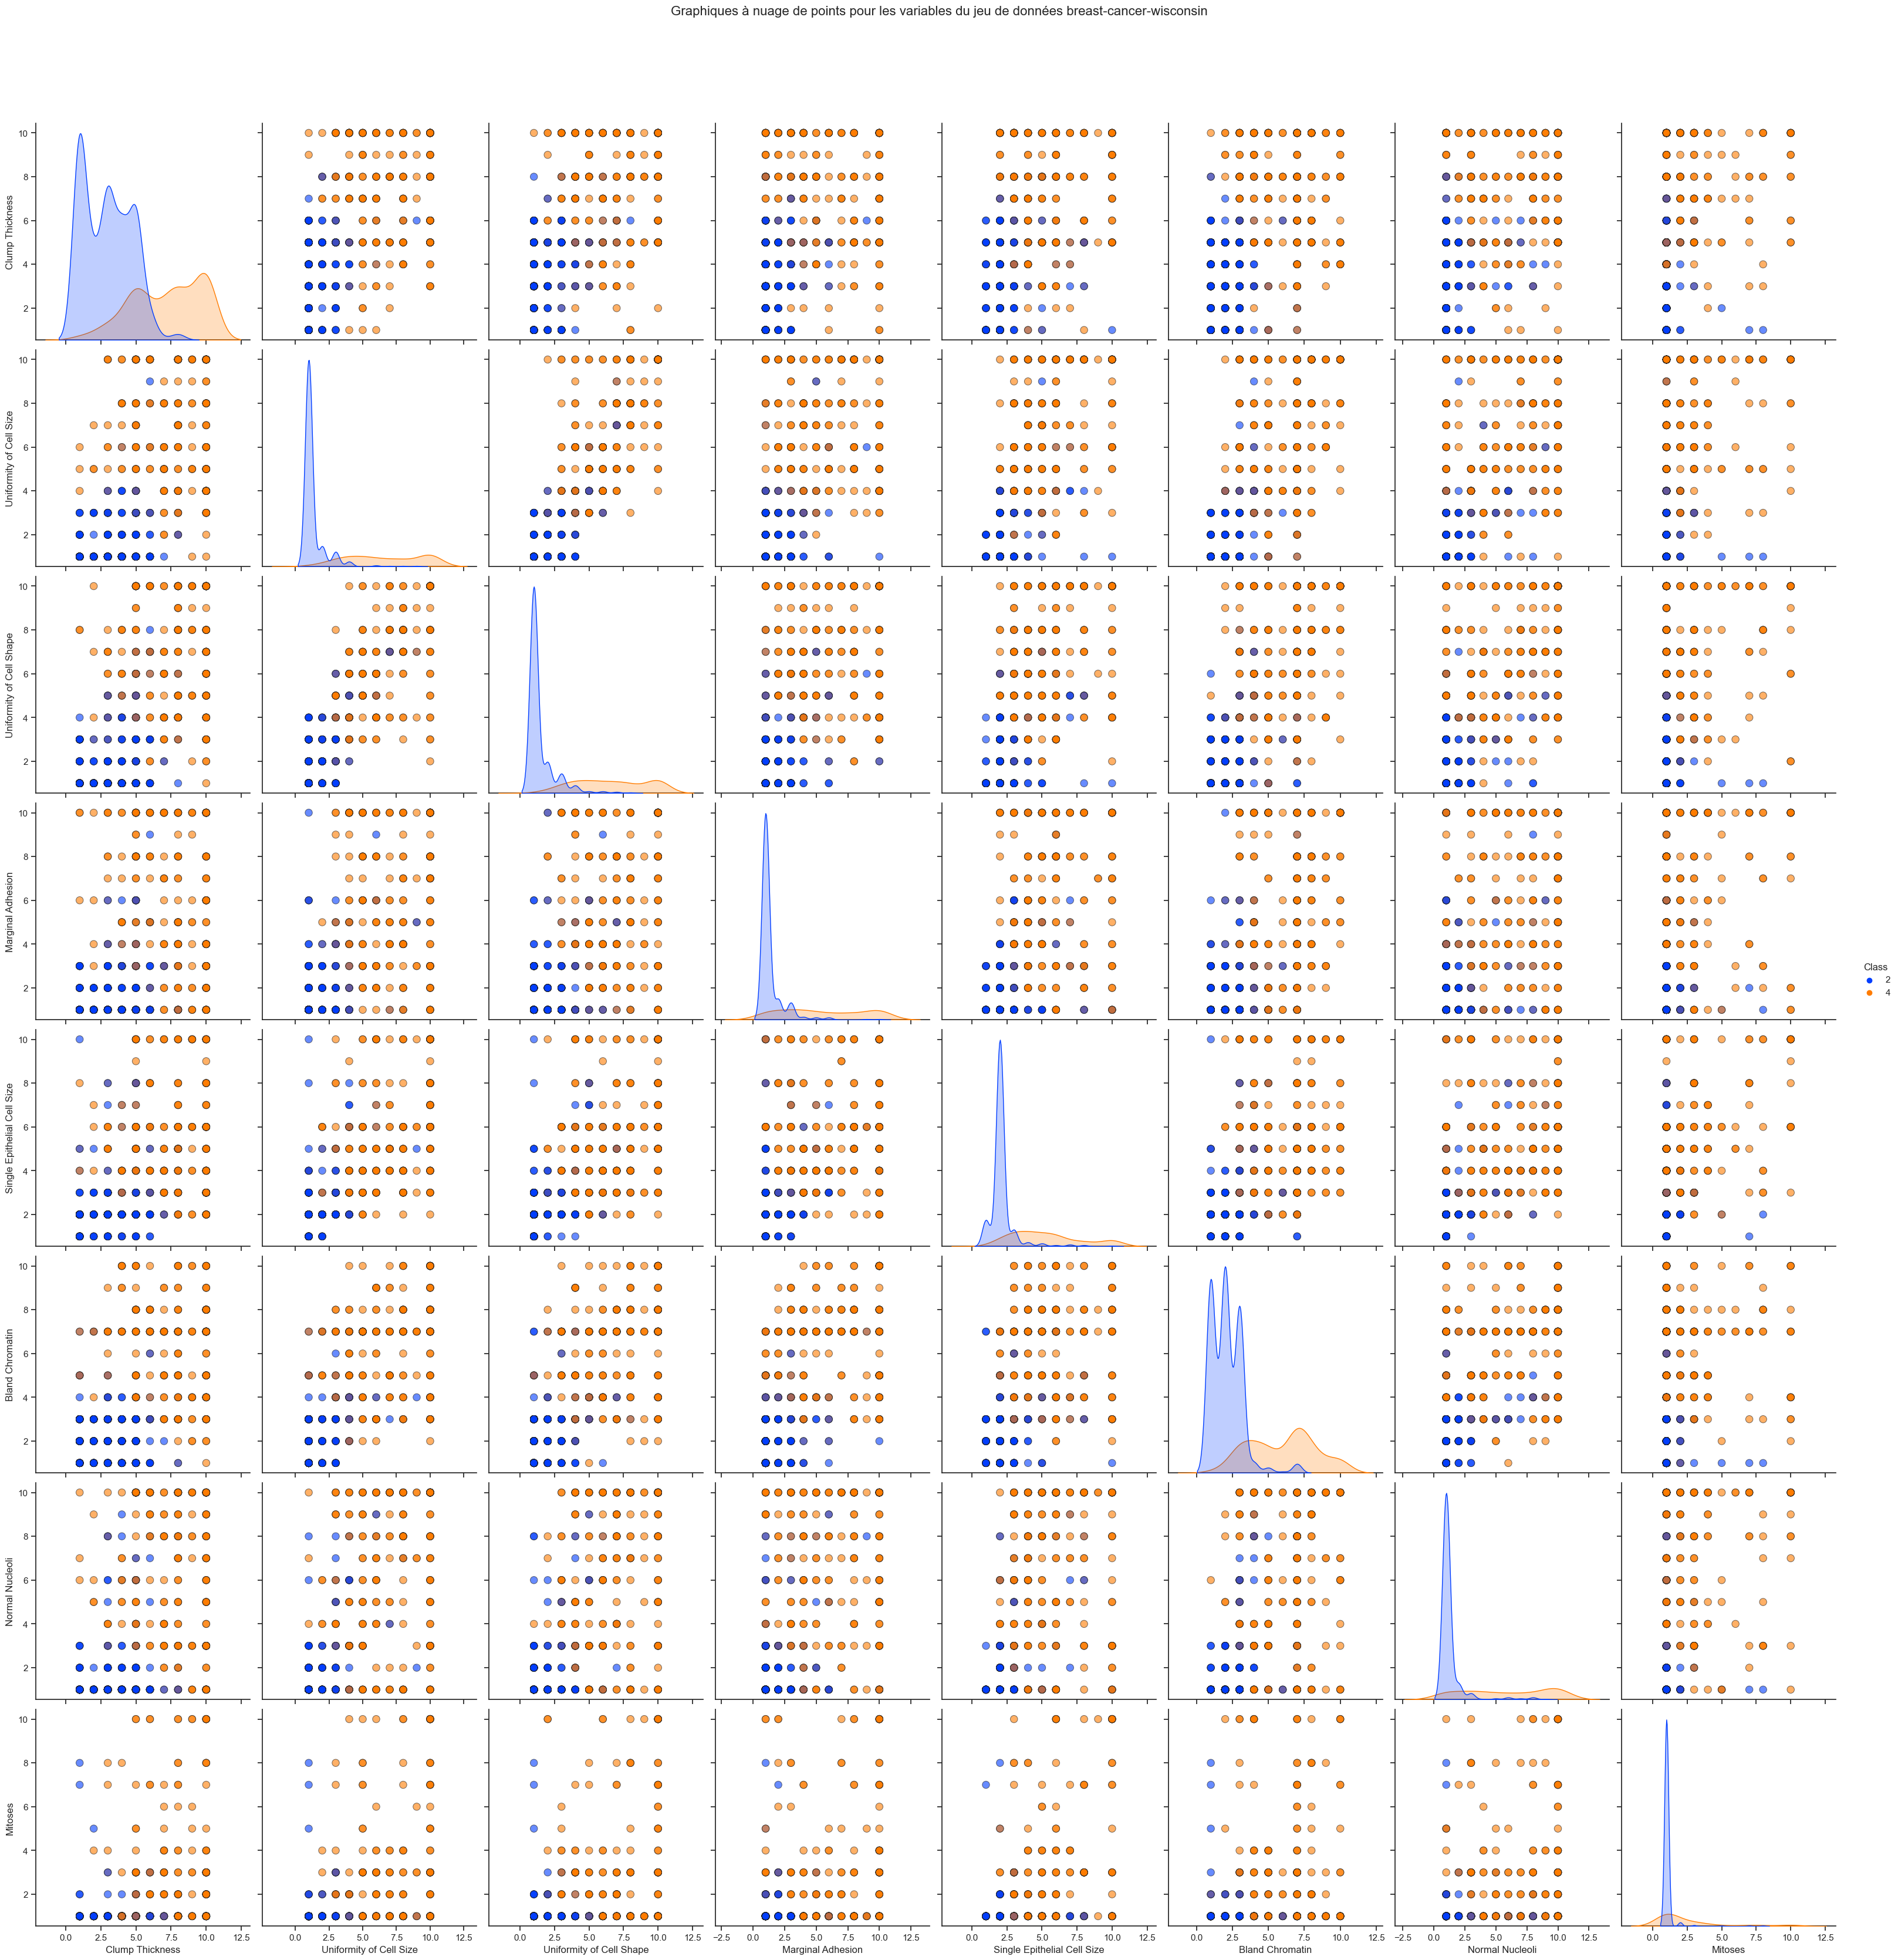

In [11]:
# Configurer les paramètres de style de seaborn
sns.set(style="ticks", color_codes=True)

# Utiliser seaborn pour créer des graphiques à nuage de points pour voir les relations entre les variables
sns.pairplot(df2, hue='Class'
             ,palette='bright',height=4,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

# Ajouter des titres aux graphiques
plt.suptitle('Graphiques à nuage de points pour les variables du jeu de données breast-cancer-wisconsin', fontsize=16, y=1.05)
''

> Il n'y a pas de caractéristique qui distingue/sépare trivialement les deux classes à première vue. </br>

* Corrélation entre les caractéristiques



<AxesSubplot: >

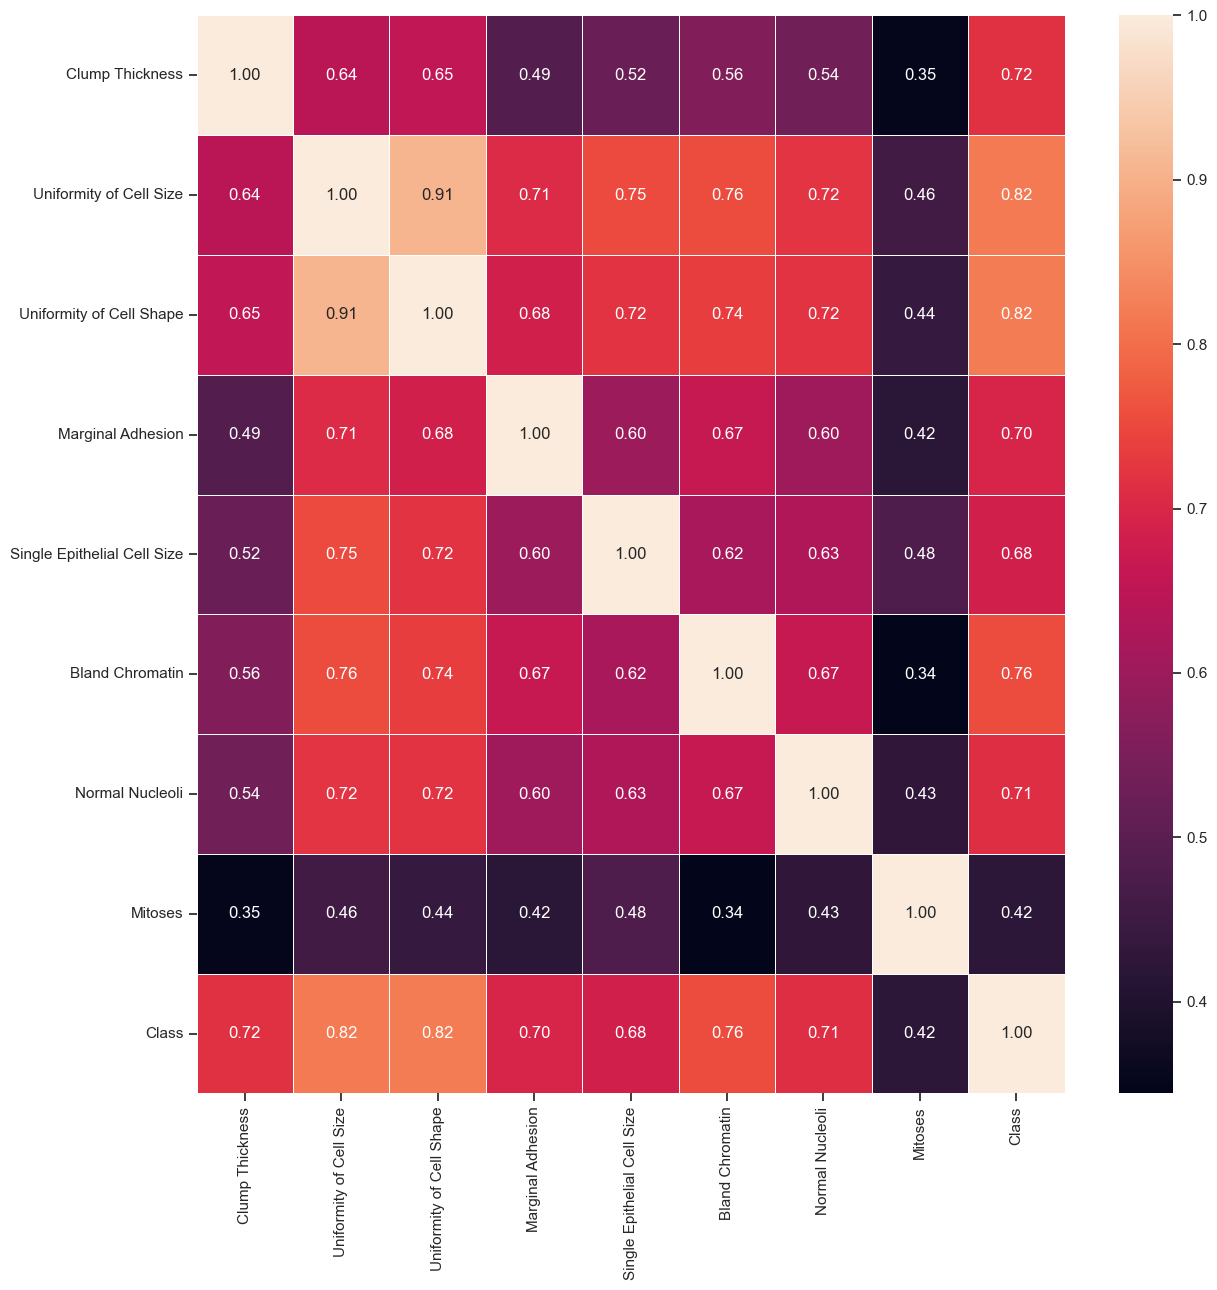

In [12]:
#Graphe de corrélation
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df2.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

> Les caractéristiques sont plutôt corrélée à la classe, mis à par mitoses  </br>
  D'une autre part, Uniformity of Cell Shape et Uniformity of Cell Size ont une corrélation entre eux assez importante. On verra si cela fait surajuster le modèle
   Uniformity of Cell Shape et Uniformity of Cell Size sont moyennement corrélées avec Single Epithelial Cell Size, Normal Nucleoli

</a>

2. Nettoyage des données

* Valeurs de lignes dupliqués

In [13]:
df2[df2.duplicated(keep=False)]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
4,4,1,1,3,2,1,3,1,1,2
10,1,1,1,1,1,1,3,1,1,2
11,2,1,1,1,2,1,2,1,1,2
16,4,1,1,1,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1,1,1,1,2
688,4,1,1,1,2,1,1,1,1,2
690,1,1,1,3,2,1,1,1,1,2
692,3,1,1,1,2,1,1,1,1,2


 > Avant le traitement des lignes dupliqués

- Retirer les lignes dupliqués

In [14]:
df2.drop_duplicates(keep='first', inplace=True)

> Après le traitement des lignes dupliqués </br>
 on a conservé la première occurence pour tous les doublons

In [15]:
df2[df2.duplicated(keep=False)]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


* Valeurs manquantes

In [16]:
# Avant l'imputation
print('Avant Imputation: ',df2.describe())

Avant Imputation:         Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       463.000000               463.000000                463.000000   
mean          5.323974                 4.174946                  4.239741   
std           2.873752                 3.239645                  3.121767   
min           1.000000                 1.000000                  1.000000   
25%           3.000000                 1.000000                  1.000000   
50%           5.000000                 3.000000                  3.000000   
75%           8.000000                 7.000000                  7.000000   
max          10.000000                10.000000                 10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bland Chromatin  \
count         463.000000                   463.000000       463.000000   
mean            3.691145                     3.840173         4.170626   
std             3.152280                     2.446914         2.6

In [17]:
#Utilisation de MICE
# Initialiser l'objet IterativeImputer
imputer = IterativeImputer(random_state=0)

# Appliquer MICE aux colonnes contenant des valeurs manquantes
df_imputed = imputer.fit_transform(df2)

# Revenir à un DataFrame pandas
df_imputed = pd.DataFrame(df_imputed, columns=df2.columns)

# Vérifier si il y a encore des valeurs manquantes
print(df_imputed.isnull().sum())

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [18]:
# Après l'imputation
print('Après Imputation: ',df_imputed.describe())

Après Imputation:         Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       463.000000               463.000000                463.000000   
mean          5.323974                 4.174946                  4.239741   
std           2.873752                 3.239645                  3.121767   
min           1.000000                 1.000000                  1.000000   
25%           3.000000                 1.000000                  1.000000   
50%           5.000000                 3.000000                  3.000000   
75%           8.000000                 7.000000                  7.000000   
max          10.000000                10.000000                 10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count         463.000000                   463.000000   463.000000   
mean            3.691145                     3.840173     4.739819   
std             3.152280                     2.446914     3.852516   
min    

In [19]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              463 non-null    float64
 1   Uniformity of Cell Size      463 non-null    float64
 2   Uniformity of Cell Shape     463 non-null    float64
 3   Marginal Adhesion            463 non-null    float64
 4   Single Epithelial Cell Size  463 non-null    float64
 5   Bare Nuclei                  463 non-null    float64
 6   Bland Chromatin              463 non-null    float64
 7   Normal Nucleoli              463 non-null    float64
 8   Mitoses                      463 non-null    float64
 9   Class                        463 non-null    float64
dtypes: float64(10)
memory usage: 36.3 KB


* Répartition des données

In [20]:
#Changement de l'encodage pour Bénigne = 2 vers Bégnine = 0
#                         pour Maligne = 4 vers Maligne = 1

df_imputed['Class'].replace({2:0, 4:1}, inplace=True)
df_imputed.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


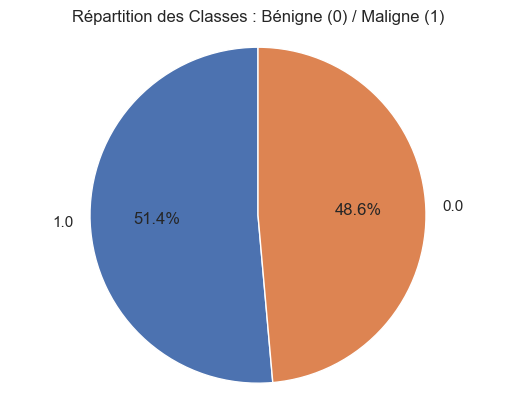

In [21]:
# Créer un compteur pour les valeurs de la colonne 'Class'
class_counts = df_imputed['Class'].value_counts()


# Utiliser matplotlib pour créer un graphique en camembert
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)

# Ajouter un titre
plt.title('Répartition des Classes : Bénigne (0) / Maligne (1)')

# Utiliser la fonction plt.axis pour rendre le camembert carré
plt.axis('equal')

# Afficher le graphique
plt.show()

> Les deux classes sont bien équilibrées après la suppression des doublons en ligne

In [22]:
print(df_imputed.shape)

(463, 10)


* Outliers (Valeurs aberrantes)

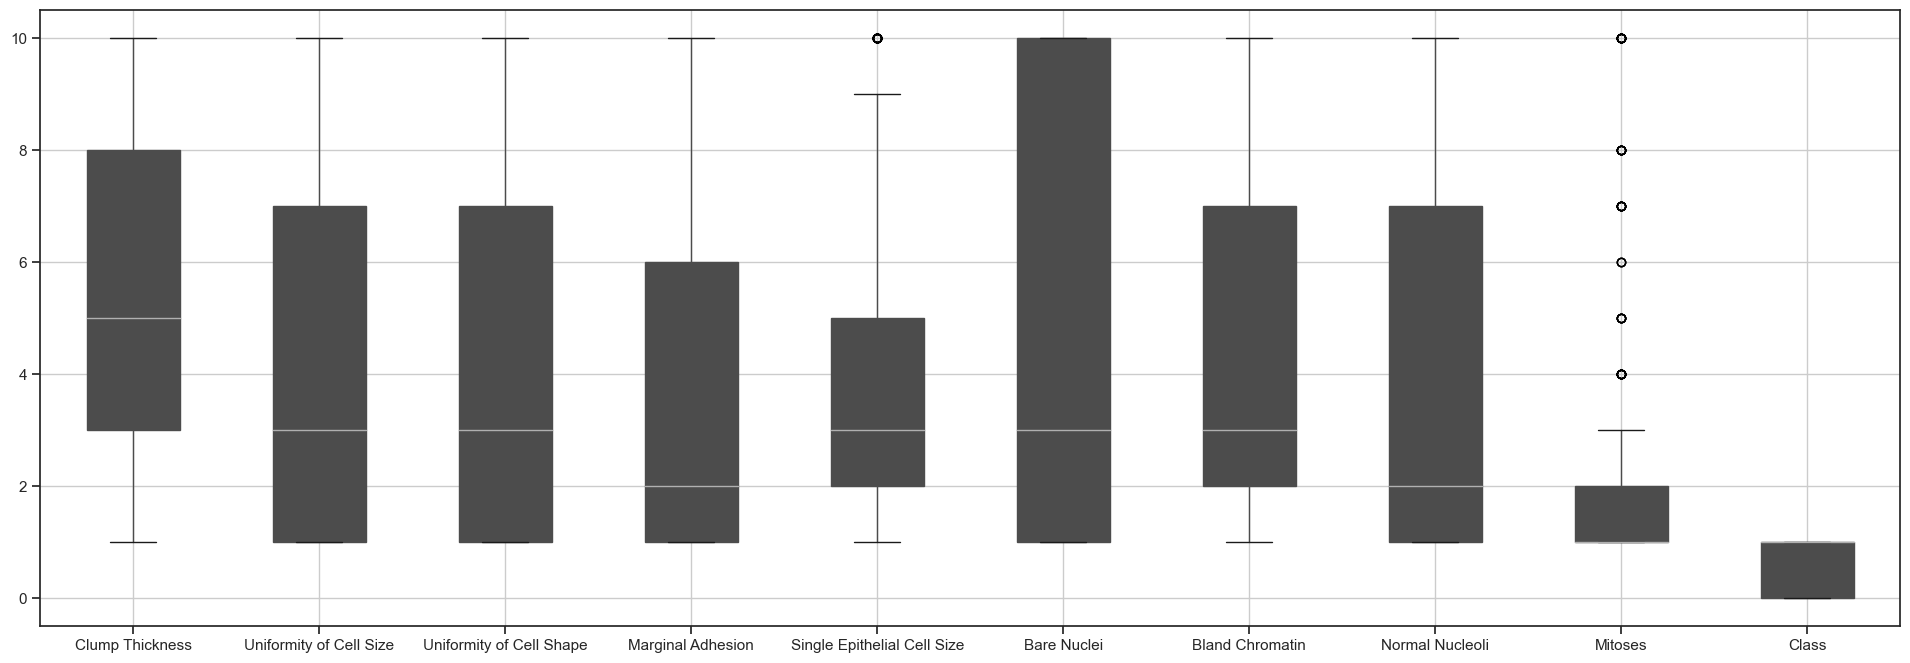

In [23]:
ax = df_imputed.boxplot(patch_artist=True,figsize=(24,8))

### Outliers Single Epithelial Cell Size

### Retirer les outliers Single Epithelial Cell Size

In [24]:
# identify outliers for Single Epithelial Cell Size
iqr = np.subtract(*np.percentile(df_imputed['Single Epithelial Cell Size'], [75, 25]))
print('IQR: ',iqr)

q25, q75 = np.percentile(df_imputed['Single Epithelial Cell Size'], 25), np.percentile(df_imputed['Single Epithelial Cell Size'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_imputed['Single Epithelial Cell Size'] if x < lower or x > upper]
print('Identified outliers for Single Epithelial Cell Size out of 463 records: %d' % len(outliers))

IQR:  3.0
Identified outliers for Single Epithelial Cell Size out of 463 records: 30


In [25]:
#Moyenne avant retiré outlier à Single Epithelial Cell Size
df_imputed['Single Epithelial Cell Size'].mean()

3.840172786177106

In [26]:
pd.crosstab(df_imputed['Single Epithelial Cell Size'],df_imputed['Class'])

Class,0.0,1.0
Single Epithelial Cell Size,,
1.0,27,1
2.0,151,23
3.0,27,42
4.0,7,41
5.0,5,34
6.0,2,39
7.0,3,9
8.0,2,18
9.0,0,2


In [27]:
# On a remplacé par la valeur la plus basse après le max
df_imputed['Single Epithelial Cell Size'] = [9 if x > 9 else x for x in df_imputed['Single Epithelial Cell Size']]

In [28]:
#Moyenne après avoir imputé outlier à Single Epithelial Cell Size
df_imputed['Single Epithelial Cell Size'].mean()

3.775377969762419

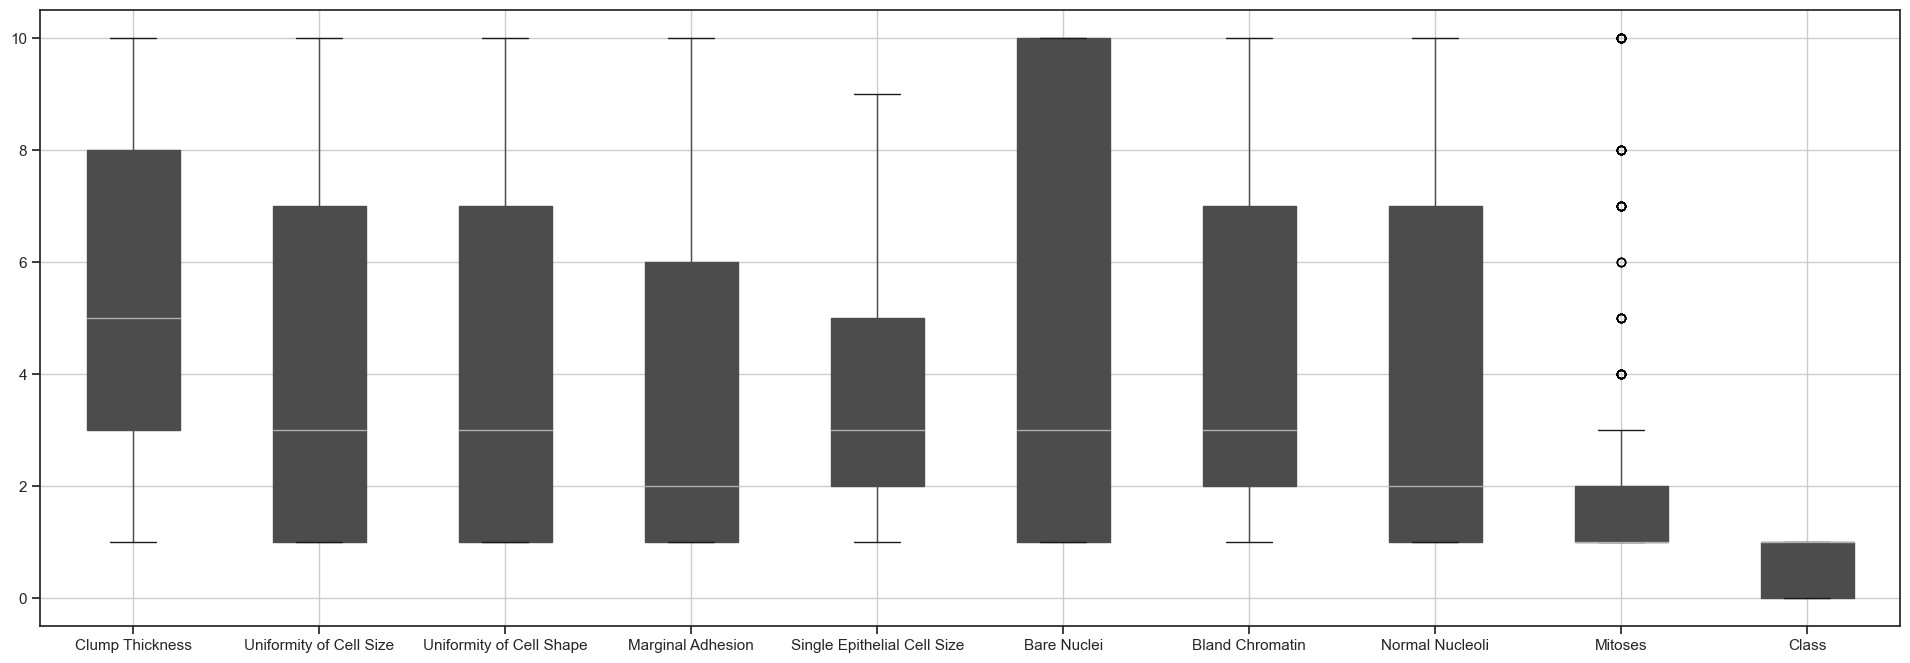

In [29]:
ax = df_imputed.boxplot(patch_artist=True,figsize=(24,8))

In [30]:
pd.crosstab(df_imputed['Single Epithelial Cell Size'],df_imputed['Class'])

Class,0.0,1.0
Single Epithelial Cell Size,,
1.0,27,1
2.0,151,23
3.0,27,42
4.0,7,41
5.0,5,34
6.0,2,39
7.0,3,9
8.0,2,18
9.0,1,31


### Outliers Mitoses 

### Retirer les outliers Mitoses

In [31]:
# identify outliers for Mitoses
iqr = np.subtract(*np.percentile(df_imputed['Mitoses'], [75, 25]))
print('IQR: ',iqr)

q25, q75 = np.percentile(df_imputed['Mitoses'], 25), np.percentile(df_imputed['Mitoses'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_imputed['Mitoses'] if x < lower or x > upper]
print('Identified outliers for Mitoses out of 463 records: %d' % len(outliers))

IQR:  1.0
Identified outliers for Mitoses out of 463 records: 52


In [32]:
#Moyenne avant retiré outlier à Mitoses
df_imputed['Mitoses'].mean()

1.8855291576673867

In [33]:
pd.crosstab(df_imputed['Mitoses'],df_imputed['Class'])

Class,0.0,1.0
Mitoses,,
1.0,212,132
2.0,8,27
3.0,2,30
4.0,0,12
5.0,1,5
6.0,0,3
7.0,1,8
8.0,1,7
10.0,0,14


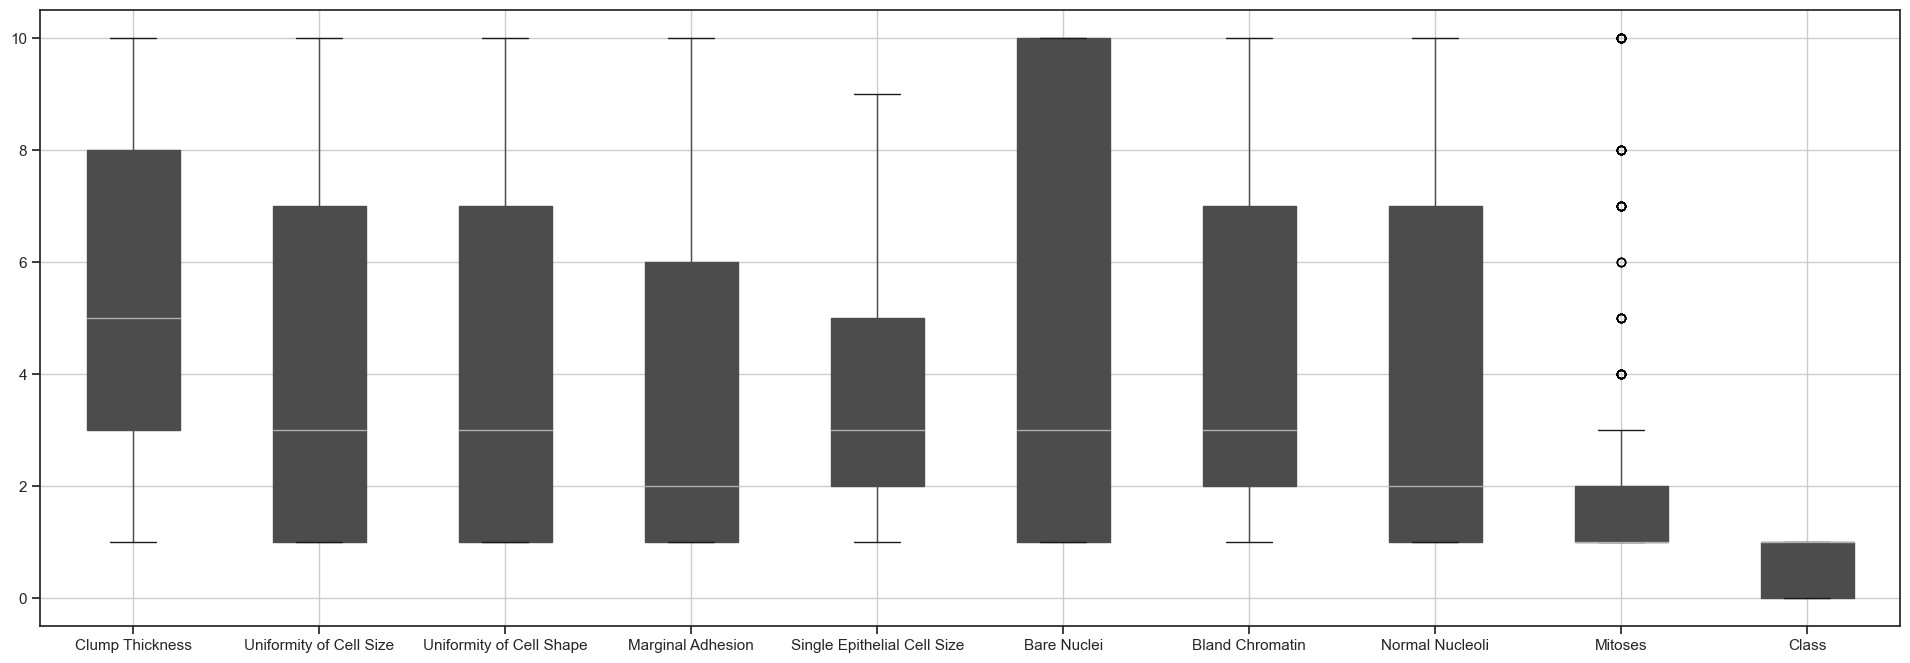

In [34]:
ax = df_imputed.boxplot(patch_artist=True,figsize=(24,8))

In [35]:
# On a remplacé par la valeur la plus basse après le max
df_imputed['Mitoses'] = [2 if x > 3 else x for x in df_imputed['Mitoses']]

In [36]:
#Moyenne après retiré outlier à Mitoses
df_imputed['Mitoses'].mean()

1.326133909287257

In [37]:
pd.crosstab(df_imputed['Mitoses'],df_imputed['Class'])

Class,0.0,1.0
Mitoses,,
1.0,212,132
2.0,11,76
3.0,2,30


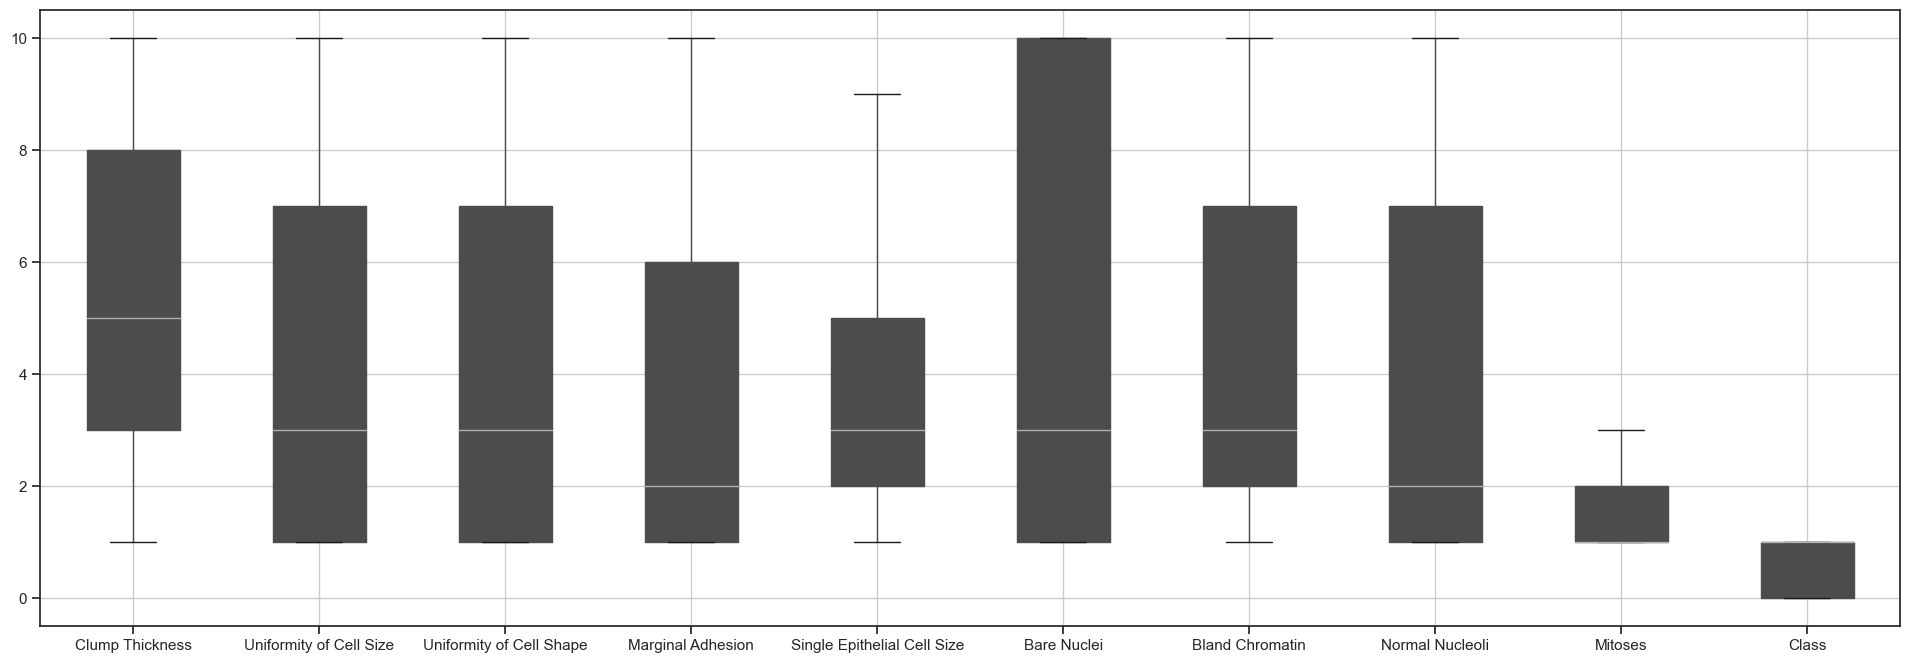

In [38]:
ax = df_imputed.boxplot(patch_artist=True,figsize=(24,8))

* Normalisation des données

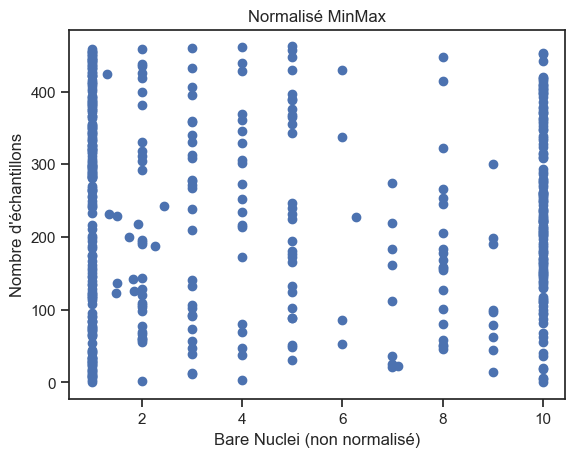

In [39]:
plt.scatter(df_imputed['Bare Nuclei'],df_imputed.index)
plt.title('Normalisé MinMax')
plt.xlabel('Bare Nuclei (non normalisé)')
plt.ylabel("Nombre d'échantillons")
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser l'objet MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fitter et transformer les données
df_norm = scaler.fit_transform(df_imputed)

# Le résultat est un tableau numpy
df_norm = pd.DataFrame(df_norm, columns=df_imputed.columns)


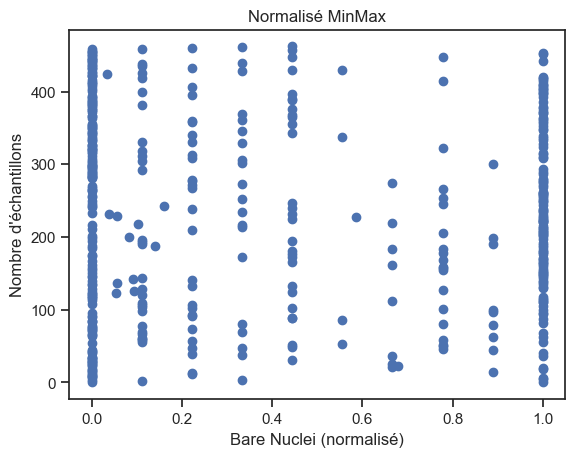

In [41]:
plt.scatter(df_norm['Bare Nuclei'],df_norm.index)
plt.title('Normalisé MinMax')
plt.xlabel('Bare Nuclei (normalisé)')
plt.ylabel("Nombre d'échantillons")
plt.show()

* Fonctions roughset

In [42]:
#Calculate indiscernibility roughset concept
def ind(dataframe, attributs):
    if not attributs:
        return {0 : dataframe.index.tolist()}
    dataframe = dataframe.sort_values(by=attributs)
    dclasses = dataframe.groupby(attributs).groups
    return dclasses

In [43]:
#Calculate positive région roughset concept
def positive_region_opt(P,X):
    pos = set()
    for x in X.values():
        lower_appro = lower_approximation_opt(P,x)
        pos = pos.union(lower_appro)
    return pos

#Calculate lower approximation roughset concept
def lower_approximation_opt(P, X):
    approx = set()
    for eq_class in P.values():
        eq_class = set(eq_class)
        if eq_class.issubset(set(X)):
            approx = approx.union(eq_class)
    return approx

In [44]:
#Calculate upper approximation roughset concept
def upper_approximation_opt(P, X):
    approx = set()
    for eq_class in P.values():
      eq_class = set(eq_class)
      if eq_class.intersection(set(X)):
        approx = approx.union(eq_class)
    return approx


In [45]:
#Calculate all upper approximation on a subset given, roughset concept
def P_upper_approximation_opt(P,X):
    up = set()
    for x in X:
        upper_approx = upper_approximation_opt(P,x)
        up = up.union(upper_approx)
    return up

In [46]:
#Calculate boundary region roughset concept
def boundary_region_opt(P, X):
    upper_approx = upper_approximation_opt(P, X)
    print('Upper: ',upper_approx)
    lower_approx = lower_approximation_opt(P, X)
    print('Lower: ',lower_approx)
    boundary_region = upper_approx.difference(lower_approx)
    return boundary_region

In [47]:
#Calculate bboundary roughset concept
def bboundary_region_opt(P,X):
    p_upper_approx = P_upper_approximation_opt(P, list(X.values()))
    print("P-Upper approximation: ",p_upper_approx)
    pos = positive_region_opt(P, X)
    print("Positive region: ",pos)
    bboundary_region = p_upper_approx.difference(pos)
    return bboundary_region

In [48]:
#Calculate negative region roughset concept
def negative_region_opt(P, X):
    U = set()
    for e in P.values():
        U.update(e)
    print('Univers: ',U)
    upper_approx = P_upper_approximation_opt(P, X)
    negative_region = U - upper_approx
    print('P-Upper approximation: ',upper_approx)
    return negative_region

In [49]:
#Calculate dependency attributes without df
def gamma(P, Q):
    universe = set()
    for e in P.values():
        universe.update(e)
    U = len(universe)
    positive_P_Q = positive_region_opt(P, Q)
    return float(len(positive_P_Q)) / float(U)

In [50]:
#Calculate dependency of attributes with dataframe 
def gamma_with_df(df, P, Q):
    U = df.shape[0]
    positive_P_Q = positive_region_opt(P, Q)
    return float(len(positive_P_Q)) / float(U)

In [51]:
#Converting name of column attribute in indice attribute in dataframe
def columns_to_indices(dataframe, columns):
    return set(dataframe.columns.get_indexer(columns))
    

#cols = ['a', 'b', 'd']              exemple.csv
#indices = columns_to_indices(df, cols)
#print(indices)

In [52]:
#Converting indice to name of column attribute in dataframe
def column_indices_to_names(dataframe, column_indices):
    column_names = []
    for column_index in column_indices:
        column_names.append(dataframe.columns[column_index])
    return column_names

#names = column_indices_to_names(df, {0,1,3}) exemple.csv
#print(names)

▶ Exemples d'utilisation fonctions roughset



In [53]:
P_opt = {0: [0], 1: [1, 2], 2: [3], 3: [4], 4: [5]}
X1_opt = {0, 1, 4, 5}
X2_opt = {2,3}

print('--------Exemple du cours Lower approximation--------------')
print(lower_approximation_opt(P_opt, X1_opt)) # devrait renvoyer {0,4,5}
print(lower_approximation_opt(P_opt, X2_opt)) # devrait renvoyer {3}

--------Exemple du cours Lower approximation--------------
{0, 4, 5}
{3}


In [54]:
P_opt = {0: [0], 1: [1, 2], 2: [3], 3: [4], 4: [5]}
X_opt = {0: [2,3], 1: [0, 1, 4, 5]}

print('----------Exemple du cours Positive region------')
print('Positive region = ',positive_region_opt(P_opt, X_opt))

----------Exemple du cours Positive region------
Positive region =  {0, 3, 4, 5}


In [55]:
P_opt = {0: [0], 1: [1, 2], 2: [3], 3: [4], 4: [5]}
X1_opt = {0, 1, 4, 5}
X2_opt = {2,3}

print('--------Exemple du cours Upper approximation--------------')
print(upper_approximation_opt(P_opt, X1_opt)) # devrait renvoyer {0, 1, 2, 4, 5}
print(upper_approximation_opt(P_opt, X2_opt)) # devrait renvoyer {1, 2, 3}

--------Exemple du cours Upper approximation--------------
{0, 1, 2, 4, 5}
{1, 2, 3}


In [56]:
P_opt = {0: [0], 1: [1, 2], 2: [3], 3: [4], 4: [5]}
X_opt = [{2,3},{0, 1, 4, 5}]

print('----------Exemple du cours P-Upper approximation------')
print('Upper approximation = ',P_upper_approximation_opt(P_opt, X_opt))

----------Exemple du cours P-Upper approximation------
Upper approximation =  {0, 1, 2, 3, 4, 5}


In [57]:
P_opt = {0: [0], 1: [1, 2], 2: [3], 3: [4], 4: [5]}
X1_opt = {0, 1, 4, 5}
X2_opt = {2,3}

print('----------Exemples du cours Boundary Region-------')
print('BNc(X1) = ',boundary_region_opt(P_opt, X1_opt))
print('--------------------------------------------------')
print('BNc(X2) = ',boundary_region_opt(P_opt, X2_opt))
print('\n')

----------Exemples du cours Boundary Region-------
Upper:  {0, 1, 2, 4, 5}
Lower:  {0, 4, 5}
BNc(X1) =  {1, 2}
--------------------------------------------------
Upper:  {1, 2, 3}
Lower:  {3}
BNc(X2) =  {1, 2}




In [58]:
P_opt = {0: [0], 1: [1, 2], 2: [3], 3: [4], 4: [5]}
X_opt = {0: {2,3}, 1: {0, 1, 4, 5}}

print('--------Exemple du cours Bboundary Region--------------')
print('Bboundary region = ',bboundary_region_opt(P_opt,X_opt))
print('\n')

--------Exemple du cours Bboundary Region--------------
P-Upper approximation:  {0, 1, 2, 3, 4, 5}
Positive region:  {0, 3, 4, 5}
Bboundary region =  {1, 2}




In [59]:
P_opt = {0: [0], 1: [1, 2], 2: [3], 3: [4], 4: [5]}
X_opt = [{2,3},{0, 1, 4, 5}]

print('----------Exemples du cours Negative Region-------')
print('NEG P(Q) = ',negative_region_opt(P_opt, X_opt))

----------Exemples du cours Negative Region-------
Univers:  {0, 1, 2, 3, 4, 5}
P-Upper approximation:  {0, 1, 2, 3, 4, 5}
NEG P(Q) =  set()


<a id='fst'></a>

# Feature Sélection

&nbsp;

 # Heuristique Quickreduct

In [60]:
df1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat", sep=' ', header=None, names=["Age", "Sex", "Chest pain type", "Resting blood pressure", "Serum cholesterol", "Fasting blood sugar", "Resting electrocardiographic results", "Maximum heart rate achieved", "Exercise induced angina", "Oldpeak", "The slope of the peak exercise ST segment", "Number of major vessels", "Thal", "Class"])

# Sélectionner les données et la classe
X_orig = df1.drop('Class', axis=1)
y = df1[['Class']]

# Encodage pour la colonne "Age"
age_encoder = LabelEncoder()
age_encoder.fit(["Young", "Mid", "Old"])
df1["Age_Label"] = age_encoder.transform(df1.Age.apply(lambda x: "Young" if (x < 40 or x > 20) else "Mid" if (x > 40 or x < 60) else "Old"))
df1 = pd.concat([df1, pd.get_dummies(df1["Age_Label"], prefix="Age")], axis=1)
df1.drop("Age", axis=1, inplace=True)
df1.drop("Age_Label", axis=1, inplace=True)

# Encodage pour la colonne "Blood Pressure"
blood_pressure_encoder = LabelEncoder()
blood_pressure_encoder.fit(["Normal", "Abnormal"])
df1["Blood Pressure_Label"] = blood_pressure_encoder.transform(df1["Resting blood pressure"].apply(lambda x: "Normal" if (x>=90 or x<= 140) else "Abnormal"))
df1 = pd.concat([df1, pd.get_dummies(df1["Blood Pressure_Label"], prefix="Blood Pressure")], axis=1)
df1.drop("Resting blood pressure", axis=1, inplace=True)
df1.drop("Blood Pressure_Label", axis=1, inplace=True)

# Encodage pour la colonne "Cholestoral"
cholestoral_encoder = LabelEncoder()
cholestoral_encoder.fit(["Normal", "Abnormal"])
df1["Cholestoral_Label"] = cholestoral_encoder.transform(df1["Serum cholesterol"].apply(lambda x: "Normal" if (x<=150 or x>=250) else  "Abnormal"))
df1 = pd.concat([df1, pd.get_dummies(df1["Cholestoral_Label"], prefix="Cholestoral")], axis=1)
df1.drop("Serum cholesterol", axis=1, inplace=True)
df1.drop("Cholestoral_Label", axis=1, inplace=True)

# Encodage pour la colonne "Maximum heart rate"
maximum_heart_rate_encoder = LabelEncoder()
maximum_heart_rate_encoder.fit(["Low", "Normal", "High"])
df1["Maximum Heart Rate_Label"] = maximum_heart_rate_encoder.transform(df1["Maximum heart rate achieved"].apply(lambda x: "Normal" if (x >= 60 or x<=100) else "Low" if x<60  else "High"))
df1 = pd.concat([df1, pd.get_dummies(df1["Maximum Heart Rate_Label"], prefix="Maximum Heart Rate")], axis=1)
df1.drop("Maximum heart rate achieved", axis=1, inplace=True)
df1.drop("Maximum Heart Rate_Label", axis=1, inplace=True)

class_column = df1["Class"]
df1 = df1.drop("Class", axis=1)
df1 = pd.concat([df1, class_column], axis=1)

In [61]:
#Find one mimimal reduct from condition attributes C and decision attribute D 
def qreduct(dataframe,C,D):
    R = set()
    ind_D = ind(dataframe, D)
    ind_C = ind(dataframe, C)
    X = columns_to_indices(dataframe,C)
    while True:
        T = R
        for x in X-R:
            ind_R_union = ind(dataframe, column_indices_to_names(dataframe, R.union(set([x]))))
            ind_T = ind(dataframe, column_indices_to_names(dataframe,T))
            if gamma_with_df(dataframe,ind_R_union,ind_D) > gamma_with_df(dataframe,ind_T,ind_D):
               T = R.union(set([x]))
        R = T
        ind_R = ind(dataframe, column_indices_to_names(dataframe,R))
        if gamma_with_df(dataframe,ind_R,ind_D) == gamma_with_df(dataframe,ind_C,ind_D):
          break
    return R


### Test sur exemple avec encodages fournis

In [62]:
#Attributes of condition and attributes of decision
C_qreduct = df1.columns[:-1].tolist()
D_qreduct = [df1.columns[-1]]


# Find a minimal reduct
qreduct_reduct = qreduct(df1,C_qreduct,D_qreduct)
names = column_indices_to_names(df1, qreduct_reduct)
print(names)

['Sex', 'Chest pain type', 'Resting electrocardiographic results', 'Exercise induced angina', 'Oldpeak', 'Number of major vessels', 'Thal', 'Cholestoral_0']


### Test sur exemples du cours (CF Annexe pour tous les résultats)

> exemple.csv   
    -  4  attributs de condition

In [63]:
df_exemple = pd.read_csv("CSV/exemple.csv")

df_exemple.head()

,a,b,c,d,e
0,1,0,2,2,0
1,0,1,1,1,2
2,2,0,0,1,1
3,1,1,0,2,2
4,1,0,2,0,1


In [64]:
#Attributes of condition and attributes of decision
C_qreduct = df_exemple.columns[:-1].tolist()
D_qreduct = [df_exemple.columns[-1]]

# Find a minimal reduct
qreduct_reduct_exemple = qreduct(df_exemple,C_qreduct,D_qreduct)
names_exemple = column_indices_to_names(df_exemple, qreduct_reduct_exemple)
print(names_exemple)

['b', 'd']


> exemple2.csv   
    -  3  attributs de condition

In [65]:
df_exemple2 = pd.read_csv("CSV/exemple2.csv")

df_exemple2.head()

,Headache,Muscle-pain,Temperature,Flu
0,Yes,Yes,very high,Yes
1,Yes,No,high,Yes
2,Yes,No,high,No
3,No,Yes,normal,No
4,No,Yes,high,Yes


In [66]:
#Attributes of condition and attributes of decision
C_qreduct = df_exemple2.columns[:-1].tolist()
D_qreduct = [df_exemple2.columns[-1]]

# Find a minimal reduct
qreduct_reduct_exemple2 = qreduct(df_exemple2,C_qreduct,D_qreduct)
names_exemple2 = column_indices_to_names(df_exemple2, qreduct_reduct_exemple2)
print(names_exemple2)

['Headache', 'Temperature']


> exemple-moyen.csv   
    -  9  attributs de condition

### Test sur exemple créé

In [67]:
df_exemple_moyen = pd.read_csv("CSV/exemple-moyen.csv")

df_exemple_moyen.head()

,f,g,h,i,j,k,l,m,n,o
0,0,1,1,1,0,2,2,1,2,0
1,2,0,2,0,1,1,1,2,0,1
2,1,2,0,2,2,0,0,0,1,2
3,0,0,1,0,1,2,2,0,2,1
4,2,1,0,1,0,0,1,2,1,2


In [68]:
#Attributes of condition and attributes of decision
C_qreduct = df_exemple_moyen.columns[:-1].tolist()
D_qreduct = [df_exemple_moyen.columns[-1]]

# Find a minimal reduct
qreduct_reduct_exemple_moyen = qreduct(df_exemple_moyen,C_qreduct,D_qreduct)
names_exemple_moyen = column_indices_to_names(df_exemple_moyen, qreduct_reduct_exemple_moyen)
print(names_exemple_moyen)

['g', 'k']


### Utilisation sur le dataset normalisé

In [69]:
#Attributes of condition and attributes of decision
C_qreduct = df_norm.columns[:-1].tolist()
D_qreduct = [df_norm.columns[-1]]

# Find a minimal reduct
qreduct_reduct_dataset = qreduct(df_norm,C_qreduct,D_qreduct)
names_qreduct_dataset = column_indices_to_names(df_norm, qreduct_reduct_dataset)
print(names_qreduct_dataset)

['Clump Thickness', 'Uniformity of Cell Size', 'Bare Nuclei', 'Bland Chromatin']


# Roughset pour selection d'attribut

In [70]:
def all_subsets(original_set):
    # Generate all possible combinations of the original set
    all_combinations = chain.from_iterable(combinations(original_set, size) for size in range(1, len(original_set) + 1))
    # Convert all combinations to sets and return the resulting list
    all_subsets = [list(combination) for combination in all_combinations]
    return all_subsets

In [71]:
#find all reducts from condition attributes C and decision attribute D
def getReducts(dataframe, C, D):
    all_reducts = []
    ind_decision = ind(dataframe,D)
    sub = all_subsets(C)
    ind_C = ind(dataframe, C)
    POSC = positive_region_opt(ind_C, ind_decision)

    for B in sub:
      if not B:
        continue
      POSB = positive_region_opt(ind(dataframe, B), ind_decision)
      if POSB == POSC:
         all_reducts.append(B)
         
    min_size = min(len(r) for r in all_reducts)
    result = [r for r in all_reducts if len(r) == min_size]  

    return result

def getCore(reducts):
  core = list(set.intersection(*map(set,reducts)))
  return core 
    

### Test sur exemple avec encodages fournis

In [72]:
#Attributes of condition and attributes of decision
C_allreducts = df1.columns[:-1].tolist()
D_allreducts = [df1.columns[-1]]

# Find the minimal reducts
all_reducts_df1 = getReducts(df1, C_allreducts, D_allreducts)
print(all_reducts_df1)

[['Sex', 'Chest pain type', 'Resting electrocardiographic results', 'Exercise induced angina', 'Oldpeak', 'Number of major vessels', 'Thal', 'Cholestoral_0'], ['Sex', 'Chest pain type', 'Resting electrocardiographic results', 'Exercise induced angina', 'Oldpeak', 'Number of major vessels', 'Thal', 'Cholestoral_1']]


>85 secondes

In [73]:
#Find the core
core = getCore(all_reducts_df1)
print(core)

['Sex', 'Oldpeak', 'Exercise induced angina', 'Thal', 'Resting electrocardiographic results', 'Chest pain type', 'Number of major vessels']


### Test sur exemples du cours (CF Annexe pour tous les résultats)

### Exemple 

In [74]:
#Attributes of condition and attributes of decision
C_allreducts = df_exemple.columns[:-1].tolist()
D_allreducts = [df_exemple.columns[-1]]

# Find the minimal reducts
all_reducts_exemple = getReducts(df_exemple, C_allreducts, D_allreducts)
print(all_reducts_exemple)

[['b', 'd'], ['c', 'd']]


In [75]:
#Find the core
core = getCore(all_reducts_exemple)
print(core)

['d']


### Exemple 2

In [76]:
#Attributes of condition and attributes of decision
C_allreducts = df_exemple2.columns[:-1].tolist()
D_allreducts = [df_exemple2.columns[-1]]

# Find the minimal reducts
all_reducts_exemple2 = getReducts(df_exemple2, C_allreducts, D_allreducts)
print(all_reducts_exemple2)

[['Headache', 'Temperature'], ['Muscle-pain', 'Temperature']]


In [77]:
#Find the core
core = getCore(all_reducts_exemple2)
print(core)

['Temperature']


### Exemple créé

In [78]:
#Attributes of condition and attributes of decision
C_allreducts = df_exemple_moyen.columns[:-1].tolist()
D_allreducts = [df_exemple_moyen.columns[-1]]

# Find the minimal reducts
all_reducts_exemple_moyen = getReducts(df_exemple_moyen, C_allreducts, D_allreducts)
print(all_reducts_exemple_moyen)

[['g', 'k'], ['j', 'k']]


In [79]:
#Find the core
core = getCore(all_reducts_exemple_moyen)
print(core)

['k']


### Utilisation sur le dataset normalisé

In [80]:
#Attributes of condition and attributes of decision
C_allreducts = df_norm.columns[:-1].tolist()
D_allreducts = [df_norm.columns[-1]]

# Find the minimal reducts
all_reducts_norm = getReducts(df_norm, C_allreducts, D_allreducts)
print(all_reducts_norm)

[['Clump Thickness', 'Uniformity of Cell Size', 'Bare Nuclei', 'Bland Chromatin'], ['Clump Thickness', 'Uniformity of Cell Size', 'Bare Nuclei', 'Normal Nucleoli'], ['Clump Thickness', 'Uniformity of Cell Shape', 'Single Epithelial Cell Size', 'Bare Nuclei'], ['Clump Thickness', 'Uniformity of Cell Shape', 'Bare Nuclei', 'Normal Nucleoli'], ['Clump Thickness', 'Marginal Adhesion', 'Bare Nuclei', 'Bland Chromatin'], ['Clump Thickness', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli'], ['Uniformity of Cell Shape', 'Marginal Adhesion', 'Bare Nuclei', 'Normal Nucleoli'], ['Uniformity of Cell Shape', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin']]


In [81]:
#Find the core
core_dataset = getCore(all_reducts_norm)
print(core_dataset)

['Bare Nuclei']



# Librairie Roughset  (FRFS)


In [82]:
def create_df(X_nump):
    cols = ['col{}'.format(i) for i in range(X_nump.shape[1])]
    df_arr = pd.DataFrame(X_nump, columns=cols)
    return df_arr

def selected_columns(df_start, df_arr):
    # Liste pour stocker les noms de colonnes en commun
    common_columns = []

    # Boucle sur les colonnes de df1
    for col in df_start.columns:
        # Vérifie si la colonne existe dans df2
        for col1 in df_arr.columns:
            # Compare les valeurs de la colonne dans les deux dataframes
            if (df_start[col] == df_arr[col1]).all():
                # Ajouter le nom de colonne à la liste des colonnes en commun
                common_columns.append(col)

    return common_columns

In [83]:
from frlearn.feature_preprocessors import FRFS

# Sélectionner les données et la classe
X = df_norm.drop('Class', axis=1)
y = df_norm[['Class']]

# Convertir les données en numpy array
X_dataset = X.to_numpy()
y_dataset = y.to_numpy().ravel()  #pour éviter les erreurs de dimensions

# Create an instance of the FRFS preprocessor and process the data.
preprocessor = FRFS()
model = preprocessor(X_dataset, y_dataset)
X_frfs = model(X_dataset)

In [84]:
print(X_frfs)

[[0.44444444 0.         0.125     ]
 [0.44444444 0.33333333 0.75      ]
 [0.22222222 0.         0.125     ]
 ...
 [0.44444444 1.         0.75      ]
 [0.33333333 0.55555556 0.25      ]
 [0.33333333 0.77777778 0.375     ]]


In [85]:
new_df = create_df(X_frfs)
#new_df.head(2)

In [86]:
col = selected_columns(df_norm,new_df)
print(col)

['Clump Thickness', 'Uniformity of Cell Shape', 'Single Epithelial Cell Size']


# Technique non Roughset

In [87]:
# Sélectionner les données et la classe
X_nr = df_norm.drop('Class', axis=1)
y_nr = df_norm[['Class']]


# Initialiser le modèle de régression logistique
lr = LogisticRegression()

# Initialiser RFE avec le nombre de features souhaitées
rfe = RFE(lr)

# Transformer les données en utilisant RFE
X_rfe = rfe.fit_transform(X_nr, y_nr.values.ravel())

# Get the column names of the DataFrame
cols = X_nr.columns

# Use boolean indexing to select the columns whose corresponding value in rfe.support_ is True
selected_cols = cols[rfe.support_]

# Print the selected columns
print(list(selected_cols))

['Clump Thickness', 'Uniformity of Cell Size', 'Bare Nuclei', 'Bland Chromatin']


# Résultats
<a id='resultats'></a>


## Evaluation de la pertinence des caractéristiques sélectionnées via modèle de classification sur jeu de données UCI

In [88]:
# Pipeline pour KNN
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Pipeline pour arbre de décision
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=0))
])

# Pipeline pour SVM
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))
])

In [89]:
def train_and_evaluate_model(pipe, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    plot_roc_curve(y_test, y_proba)

def plot_roc_curve(y_test, y_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [90]:
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    print(df_cm)

def print_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))


## Sans sélection de features résultats

In [91]:
#Le X sans sélection de features
X_eval_sans = df_norm.drop('Class', axis = 1) 

In [92]:
X_train_sans, X_test_sans, y_train_sans, y_test_sans = train_test_split(X_eval_sans, y, test_size=0.2)

### Knn

Accuracy: 0.946236559139785
ROC AUC: 0.9710915818686401


C:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


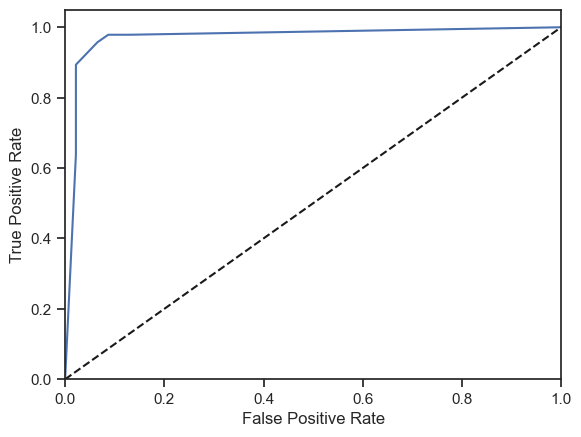

In [93]:
train_and_evaluate_model(pipe_knn, X_train_sans, y_train_sans, X_test_sans, y_test_sans)

### Decision Tree

Accuracy: 0.9032258064516129
ROC AUC: 0.9030989824236817


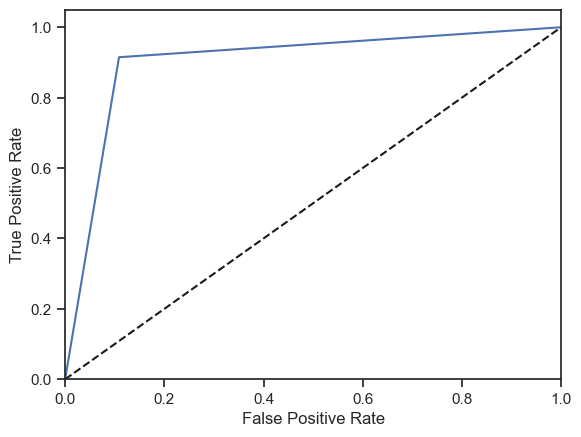

In [94]:
train_and_evaluate_model(pipe_dt, X_train_sans, y_train_sans, X_test_sans, y_test_sans)

### SVM

Accuracy: 0.956989247311828
ROC AUC: 0.9861239592969473


C:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


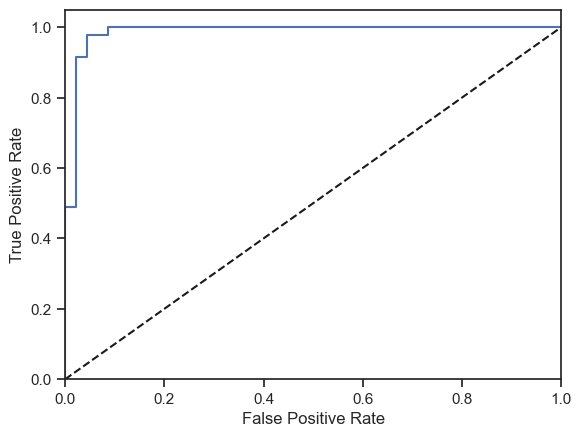

In [95]:
train_and_evaluate_model(pipe_svm, X_train_sans, y_train_sans, X_test_sans, y_test_sans)

## Partie RoughSet , QuickReduct, FRST, Non RoughSet

In [96]:
#Le X de RST et le X de QuickReduct
X_eval_allreducts = df_norm[all_reducts_norm[0]] #on prend le premier reduct trouvé
X_eval_qreduct = df_norm[names_qreduct_dataset]


y = df_norm["Class"]

In [97]:
X_train_allreducts, X_test_allreducts, y_train_allreducts, y_test_allreducts = train_test_split(X_eval_allreducts, y, test_size=0.2)

In [98]:
X_train_qreduct, X_test_qreduct, y_train_qreduct, y_test_qreduct = train_test_split(X_eval_qreduct, y, test_size=0.2)

### Rough Set résultats

### Knn

Accuracy: 0.946236559139785
ROC AUC: 0.973611111111111


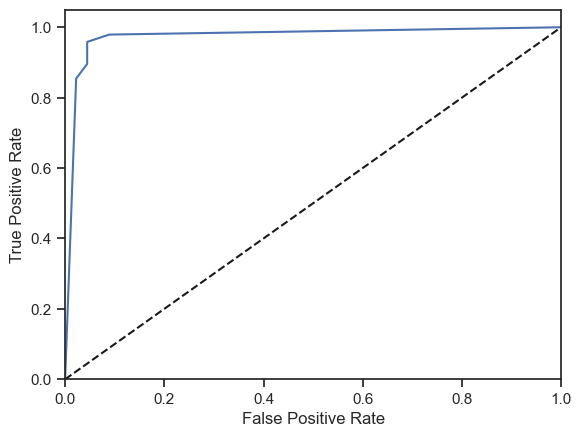

In [99]:
train_and_evaluate_model(pipe_knn, X_train_allreducts, y_train_allreducts, X_test_allreducts, y_test_allreducts)


### Decision Tree

Accuracy: 0.9247311827956989
ROC AUC: 0.9256944444444445


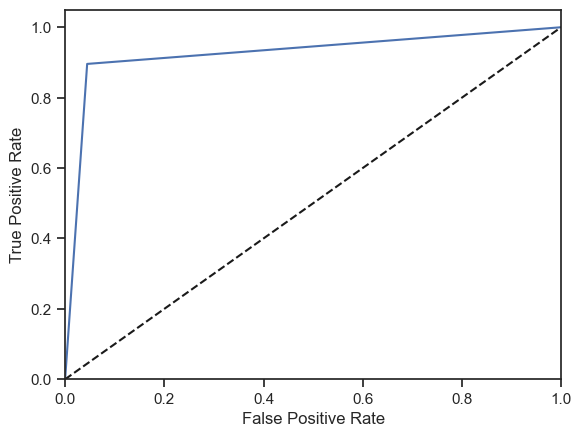

In [100]:
train_and_evaluate_model(pipe_dt, X_train_allreducts, y_train_allreducts, X_test_allreducts, y_test_allreducts)

### SVM

Accuracy: 0.946236559139785
ROC AUC: 0.9712962962962962


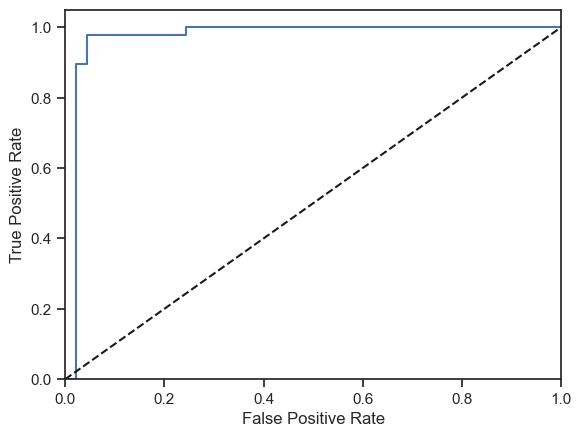

In [101]:
train_and_evaluate_model(pipe_svm, X_train_allreducts, y_train_allreducts, X_test_allreducts, y_test_allreducts)

### QuickReduct résultats

### Knn

Accuracy: 0.967741935483871
ROC AUC: 0.9847222222222222


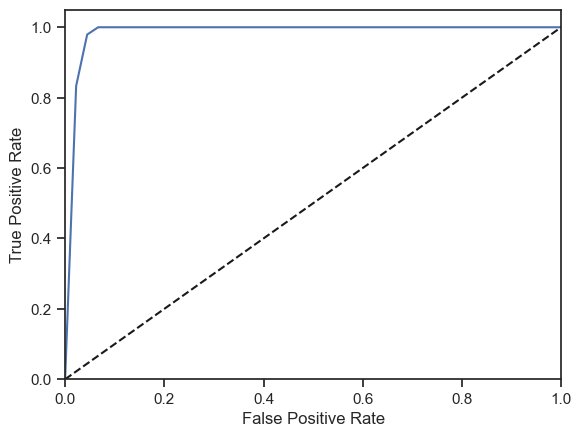

In [102]:
train_and_evaluate_model(pipe_knn, X_train_qreduct, y_train_qreduct, X_test_qreduct, y_test_qreduct)

### Decision Tree

Accuracy: 0.9354838709677419
ROC AUC: 0.9354166666666667


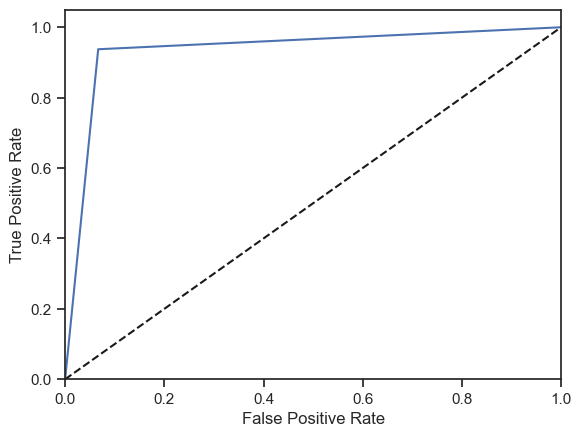

In [103]:
train_and_evaluate_model(pipe_dt, X_train_qreduct, y_train_qreduct, X_test_qreduct, y_test_qreduct)

### SVM

Accuracy: 0.967741935483871
ROC AUC: 0.9768518518518519


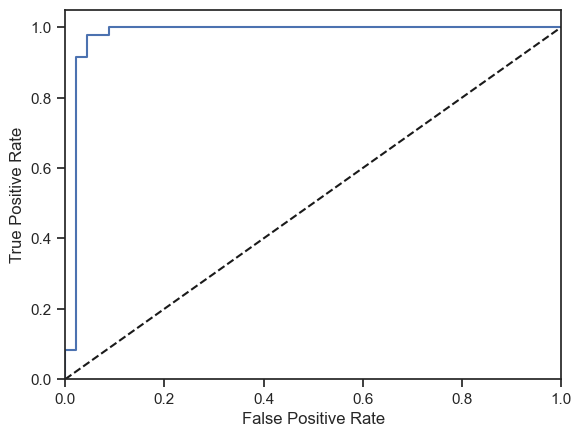

In [104]:
train_and_evaluate_model(pipe_svm, X_train_qreduct, y_train_qreduct, X_test_qreduct, y_test_qreduct)

### Librairie FRFS résultats

In [105]:
#La valeur enregistré des colonnes de FRFS
print(col)
X_eval_frfs = df_norm[col]

['Clump Thickness', 'Uniformity of Cell Shape', 'Single Epithelial Cell Size']


In [106]:
X_train_frfs, X_test_frfs, y_train_frfs, y_test_frfs = train_test_split(X_eval_frfs, y, test_size=0.2)

### Knn

Accuracy: 0.9247311827956989
ROC AUC: 0.9706290471785385


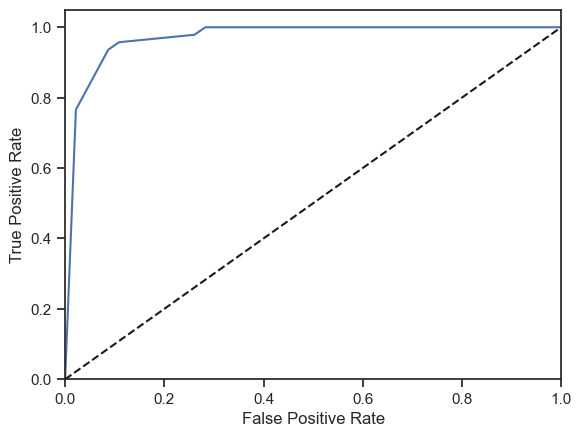

In [107]:
train_and_evaluate_model(pipe_knn, X_train_frfs, y_train_frfs, X_test_frfs, y_test_frfs)

### Decision Tree

Accuracy: 0.9354838709677419
ROC AUC: 0.9440333024976874


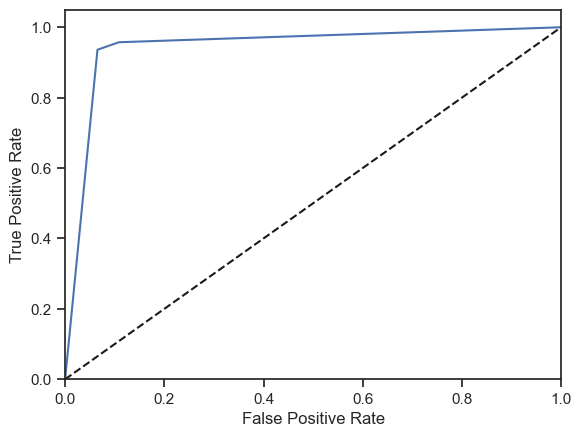

In [108]:
train_and_evaluate_model(pipe_dt, X_train_frfs, y_train_frfs, X_test_frfs, y_test_frfs)

### SVM

Accuracy: 0.9247311827956989
ROC AUC: 0.9757169287696577


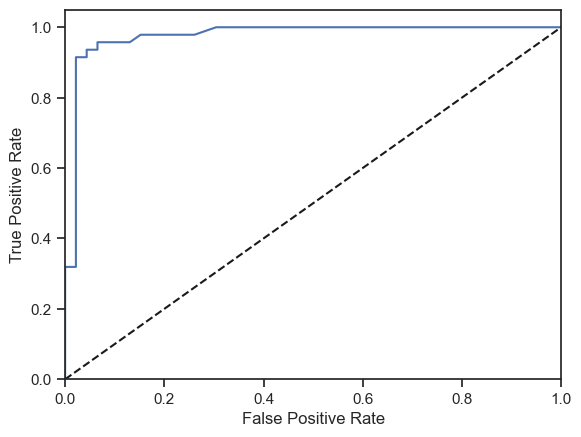

In [109]:
train_and_evaluate_model(pipe_svm, X_train_frfs, y_train_frfs, X_test_frfs, y_test_frfs)

### Technique non Roughset

In [110]:
sel_col = list(selected_cols)
print(sel_col)
      
X_eval_nrst = df_norm[sel_col]

['Clump Thickness', 'Uniformity of Cell Size', 'Bare Nuclei', 'Bland Chromatin']


In [111]:
X_train_nrst, X_test_nrst, y_train_nrst, y_test_nrst = train_test_split(X_eval_nrst, y, test_size=0.2)

### Knn

Accuracy: 0.9139784946236559
ROC AUC: 0.9673611111111111


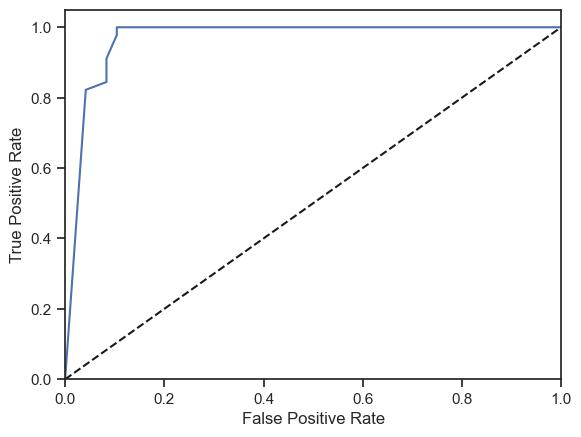

In [112]:
train_and_evaluate_model(pipe_knn, X_train_nrst, y_train_nrst, X_test_nrst, y_test_nrst)

### Decision Tree

Accuracy: 0.9032258064516129
ROC AUC: 0.9034722222222222


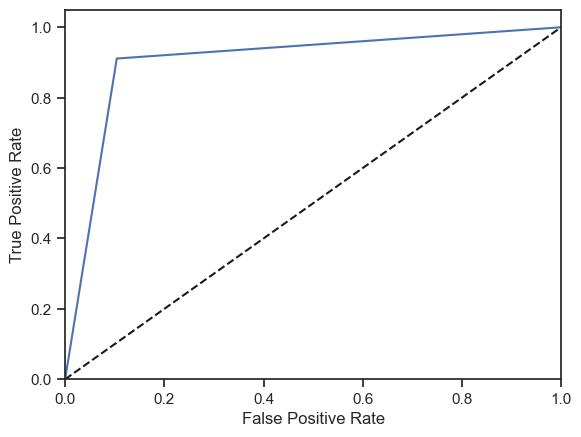

In [113]:
train_and_evaluate_model(pipe_dt, X_train_nrst, y_train_nrst, X_test_nrst, y_test_nrst)

### SVM

Accuracy: 0.9032258064516129
ROC AUC: 0.9583333333333333


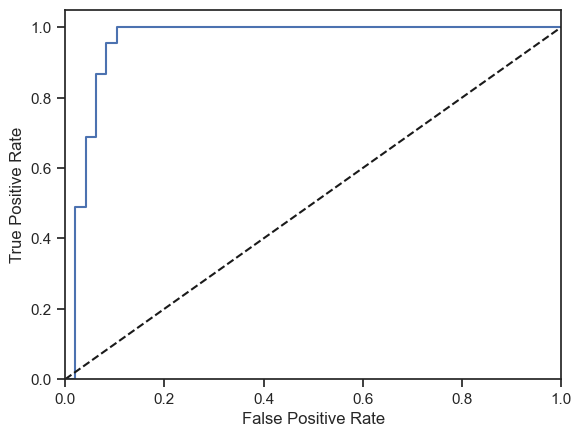

In [114]:
train_and_evaluate_model(pipe_svm, X_train_nrst, y_train_nrst, X_test_nrst, y_test_nrst)

### Evaluer de manière globale les performances

In [118]:
pipelines = [pipe_knn, pipe_dt, pipe_svm]

data = [[X_train_sans, X_test_sans, y_train_sans, y_test_sans],
[X_train_allreducts, X_test_allreducts, y_train_allreducts, y_test_allreducts],
[X_train_qreduct, X_test_qreduct, y_train_qreduct, y_test_qreduct],
[X_train_frfs, X_test_frfs, y_train_frfs, y_test_frfs],
[X_train_nrst, X_test_nrst, y_train_nrst, y_test_nrst]]

data_names = ['Sans RoughSet', 'RoughSet','QReduct', 'FRFS','Non Rough Set']

pipeline_names = ['Knn', 'Decision Tree', 'SVM']

In [121]:
def visualize_performance(pipelines, pipeline_names, data, data_names):
    for i, data_i in enumerate(data):
        X_train, X_test, y_train, y_test = data_i
        fig, axs = plt.subplots(1, len(pipelines), figsize=(15, 5))
        for j, pipeline in enumerate(pipelines):
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            axs[j].bar(['Accuracy', 'Precision'], [accuracy, precision], color=['purple', 'green'])
            axs[j].set_title(pipeline_names[j])
            for k, v in enumerate([accuracy, precision]):
                axs[j].text(k, v, str(v), color='black', va='center', ha='center')
        fig.suptitle(data_names[i])
        plt.show()


C:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


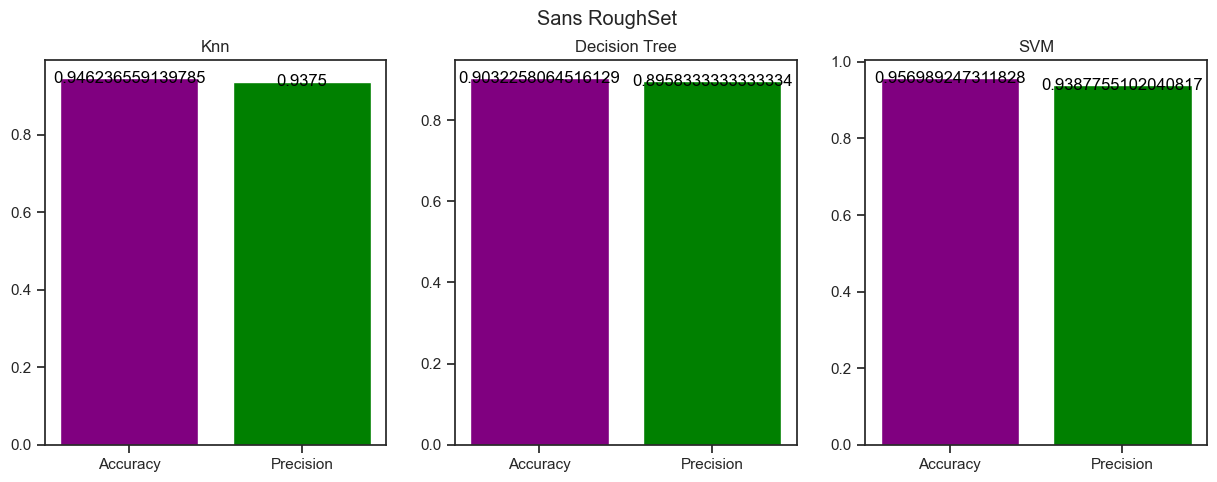

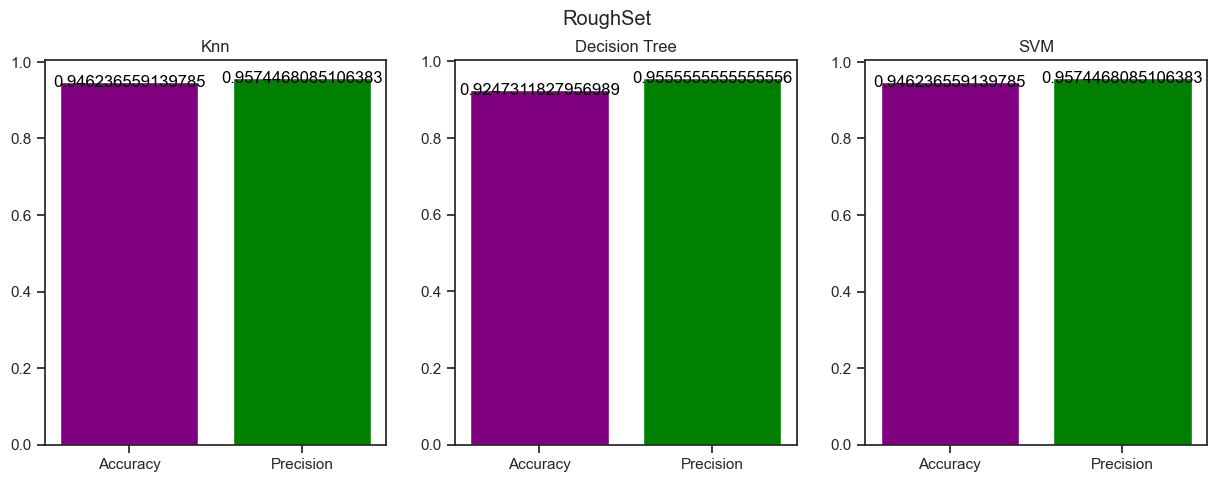

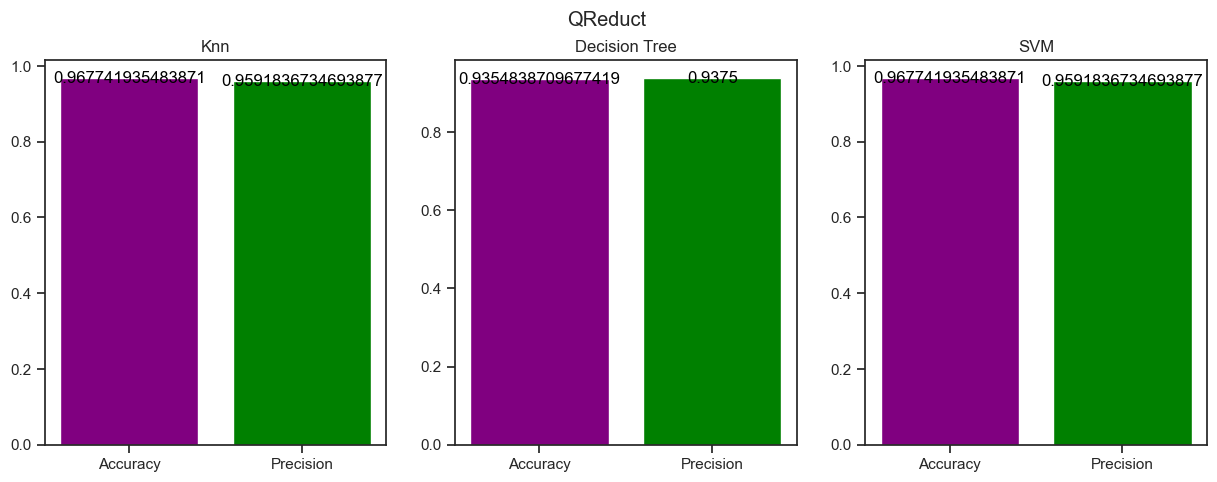

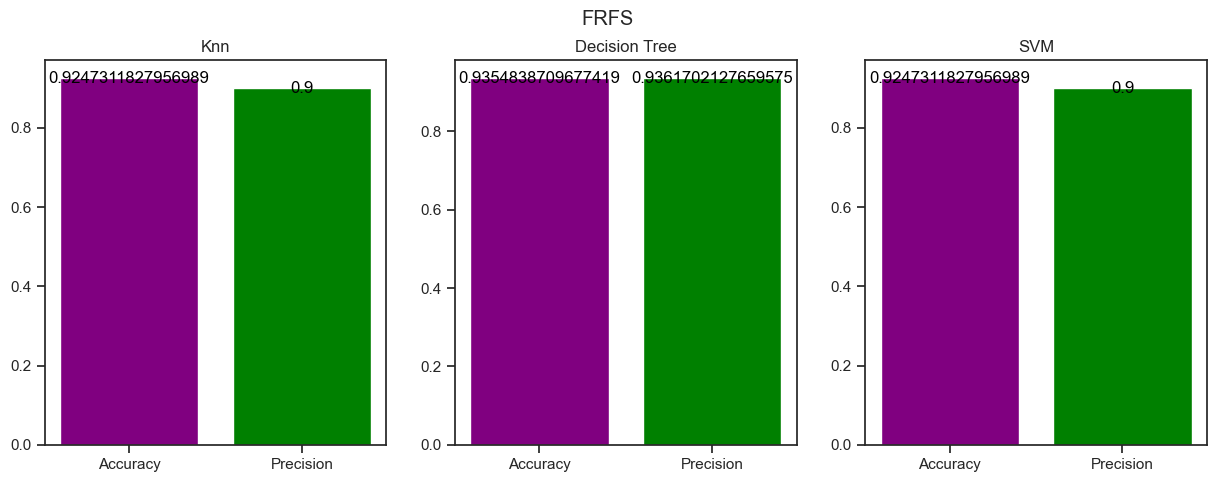

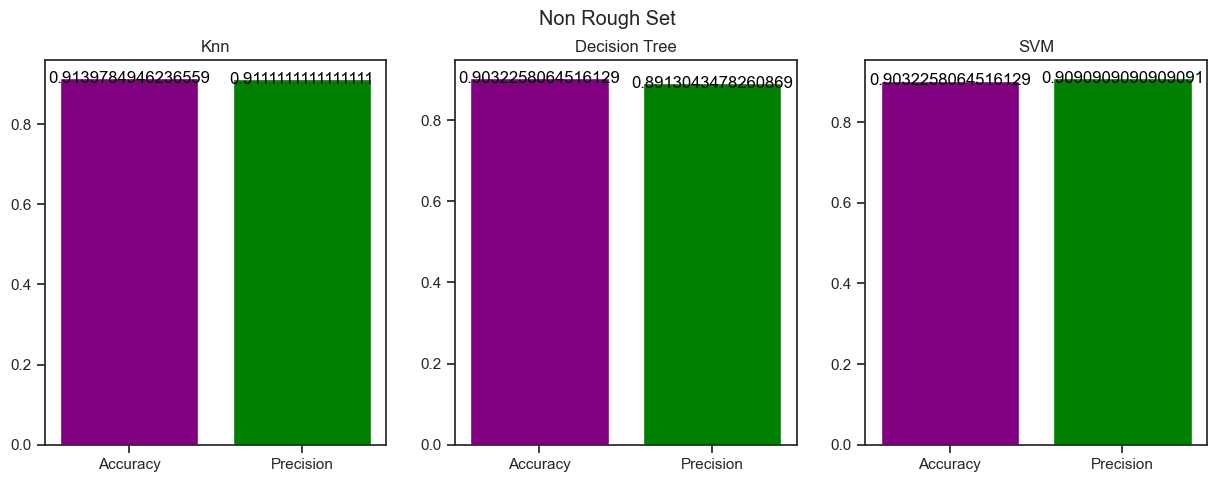

In [122]:
visualize_performance(pipelines, pipeline_names, data, data_names)

# Annexe 
<a id="annexe"></a>

* Attributs de condition et reduct
## exemple deux
    *  3  attributs condition -> {Headache,Temperature}
## exemple
    *  4  attributs condition -> {b,d}
## exemple-moyen
    *  9  attributs condition -> {g,k}
## dataset choisi (breast cancer wisconsin)
    * 10 attributs condition -> {Clump Thickness, Uniformity of Cell Size, Bare Nuclei, Bland Chromatin} 